# 1. Step 1: Split the dataset into training and testing sets.

### We will create new folders (train/test) and copy the randomly selected files into each respectively.

In [1]:
import os
import random
import shutil

In [ ]:
os.mkdir('train')
os.mkdir('test')

In [2]:
emotions = ['angry', 'fear', 'happy', 'sad']
dest1 = 'train'
dest2 = 'test'

In [19]:
for emotion in emotions:
    datafolder = "data_folder/" + emotion + "/"
    
    files = os.listdir(datafolder)
    train = random.sample(files, 70)
    difference_1 = set(files).difference(set(train))
    difference_2 = set(train).difference(set(files))
    test = list(difference_1.union(difference_2))

    for file_name in train:
        shutil.copy(os.path.join(datafolder, file_name), dest1)

    for file_name in test:
        shutil.copy(os.path.join(datafolder, file_name), dest2)

# Step 2: Exploratory Data Analysis

### Finding the distribution of labels in the randomly generated training data

In [3]:
import matplotlib.pyplot as plt
import numpy as np

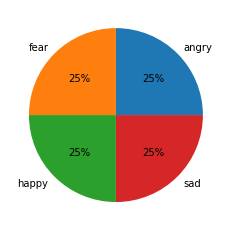

In [4]:
files = os.listdir('train')

angry_count = 0
fear_count = 0
happy_count = 0
sad_count = 0

for file_name in files:
    if emotions[0] in file_name:
        angry_count += 1
    elif emotions[1] in file_name:
        fear_count += 1
    elif emotions[2] in file_name:
        happy_count += 1
    else:
        sad_count += 1
        
counts = np.array([angry_count, fear_count, happy_count, sad_count])

plt.pie(counts, labels = emotions, autopct='%1.0f%%')
plt.show() 

### As expected, each of the emotions are equally represented
### Now look at the distribution of words in training set

In [5]:
from collections import defaultdict

In [6]:
words = defaultdict(int)

# First get the total distribution of words
for emotion in emotions:
    
    datafolder = "data_folder/" + emotion + "/"
    files = os.listdir(datafolder)
    
    for file_name in files:
        start = file_name.find('_')
        end = file_name.find('_', start + 1)
        words[file_name[start+1:end]] += 1


    
#plt.figure(figsize=(8,10))
#plt.pie(list(words.values()), labels = list(words.keys()), autopct='%1.0f%%')
#plt.show() 

In [7]:
# Get the train words distribution
train_words = defaultdict(int)

files = os.listdir('train')

for file_name in files:
    start = file_name.find('_')
    end = file_name.find('_', start + 1)
    train_words[file_name[start+1:end]] += 1

In [109]:
difference_1 = set(words.keys()).difference(set(train_words.keys()))
difference_2 = set(train_words.keys()).difference(set(words.keys()))
difference = list(difference_1.union(difference_2))
print(difference)

[]
defaultdict(<class 'int'>, {'merge': 3, 'mess': 3, 'met': 4, 'mill': 4, 'mob': 4, 'mode': 4, 'mood': 4, 'moon': 4, 'mop': 4, 'mouse': 4, 'nag': 4, 'name': 4, 'near': 4, 'neat': 4, 'nice': 4, 'note': 4, 'numb': 4, 'pad': 4, 'page': 4, 'pain': 4, 'pass': 4, 'pearl': 4, 'peg': 4, 'perch': 4, 'phone': 4, 'pick': 4, 'pike': 4, 'pole': 4, 'pool': 4, 'puff': 4, 'rag': 4, 'raid': 4, 'rain': 4, 'raise': 4, 'rat': 4, 'reach': 4, 'read': 4, 'red': 4, 'ring': 4, 'ripe': 4, 'road': 4, 'room': 4, 'rose': 4, 'rot': 4, 'rough': 4, 'rush': 4, 'said': 4, 'sail': 4, 'search': 4, 'seize': 4, 'sell': 4, 'shack': 4, 'shall': 4, 'shawl': 4, 'sheep': 4, 'shirt': 4, 'should': 4, 'shout': 4, 'size': 4, 'soap': 4, 'soup': 4, 'sour': 4, 'south': 4, 'sub': 4, 'such': 4, 'sure': 4, 'take': 4, 'talk': 4, 'tape': 4, 'team': 4, 'tell': 4, 'thin': 4, 'third': 4, 'thought': 4, 'thumb': 4, 'time': 4, 'tip': 4, 'tire': 4, 'ton': 4, 'tool': 4, 'tough': 4, 'turn': 4, 'vine': 4, 'voice': 4, 'void': 4, 'vote': 4, 'wag': 4,

### 'note' is the only word in the dataset not represented in the training data
### Now look at the distribution of labels in the testing data

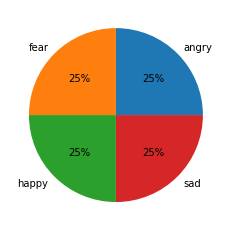

In [14]:
files = os.listdir('test')

angry_count = 0
fear_count = 0
happy_count = 0
sad_count = 0

for file_name in files:
    if emotions[0] in file_name:
        angry_count += 1
    elif emotions[1] in file_name:
        fear_count += 1
    elif emotions[2] in file_name:
        happy_count += 1
    else:
        sad_count += 1
        
counts = np.array([angry_count, fear_count, happy_count, sad_count])

plt.pie(counts, labels = emotions, autopct='%1.0f%%')
plt.show() 

In [15]:
# Get the train words distribution
test_words = defaultdict(int)

files = os.listdir('test')

for file_name in files:
    start = file_name.find('_')
    end = file_name.find('_', start + 1)
    train_words[file_name[start+1:end]] += 1

In [16]:
difference_1 = set(words.keys()).difference(set(test_words.keys()))
difference_2 = set(test_words.keys()).difference(set(words.keys()))
difference = list(difference_1.union(difference_2))
print(difference)

['tape', 'rag', 'tool', 'time', 'mouse', 'pick', 'size', 'seize', 'nag', 'sub', 'rush', 'peg', 'pearl', 'said', 'shirt', 'void', 'thin', 'red', 'wash', 'moon', 'mess', 'mood', 'pike', 'sell', 'rose', 'sail', 'room', 'take', 'tip', 'mob', 'south', 'thought', 'pool', 'witch', 'soap', 'rough', 'shawl', 'should', 'tell', 'yes', 'shout', 'met', 'vote', 'mode', 'walk', 'voice', 'name', 'shack', 'note', 'puff', 'such', 'search', 'pass', 'young', 'mop', 'merge', 'wheat', 'rain', 'tire', 'raid', 'soup', 'phone', 'talk', 'raise', 'pain', 'perch', 'youth', 'read', 'wife', 'yearn', 'road', 'week', 'thumb', 'rat', 'reach', 'wire', 'ripe', 'sour', 'nice', 'ring', 'whip', 'numb', 'team', 'third', 'sure', 'shall', 'when', 'turn', 'pad', 'near', 'rot', 'tough', 'neat', 'sheep', 'pole', 'white', 'which', 'ton', 'wag', 'mill', 'vine', 'page']


### The testing data has an equal emotion distribution as suspected, but is missing most of the words from the data set.
### Data Visualiztion

In [38]:
import librosa
from IPython.display import Audio

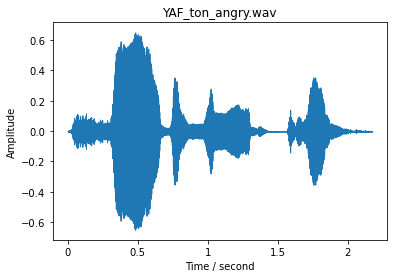

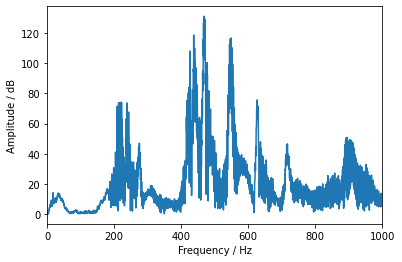

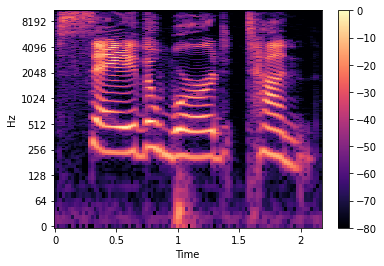

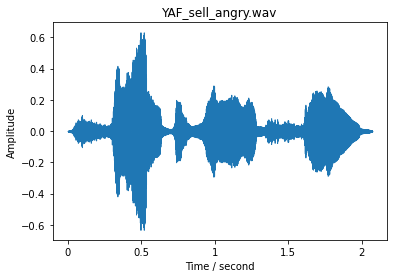

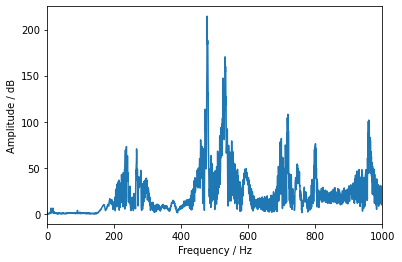

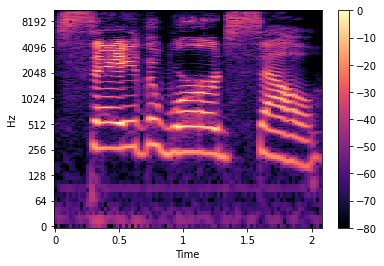

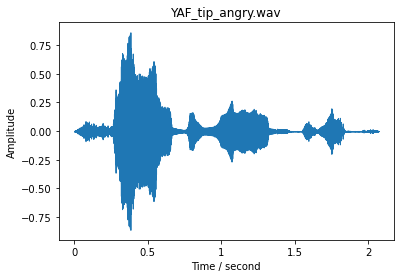

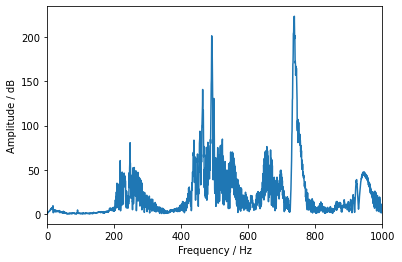

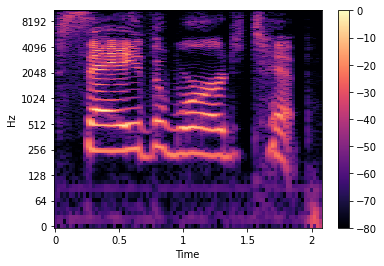

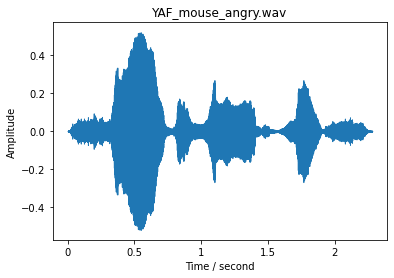

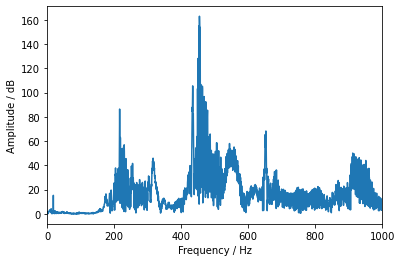

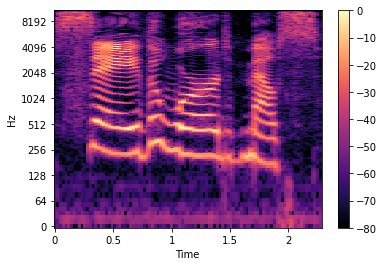

In [92]:
datafolder = "data_folder/angry/"
    
files = os.listdir(datafolder)
    
selection = random.sample(files, 4)

for i, file in enumerate(selection):
    
    signal, sample_rate = librosa.load(datafolder + file)

    plt.figure(i)
    librosa.display.waveshow(y=signal, sr=sample_rate)
    plt.xlabel('Time / second')
    plt.ylabel('Amplitude')
    plt.title(file)
    plt.show()
    
    k = np.arange(len(signal))
    T = len(signal)/sample_rate
    freq = k/T

    DATA_0 = np.fft.fft(signal)
    abs_DATA_0 = abs(DATA_0)
    plt.figure(i + 1)
    plt.plot(freq, abs_DATA_0)
    plt.xlabel("Frequency / Hz")
    plt.ylabel("Amplitude / dB")
    plt.xlim([0, 1000])
    plt.show()
    
    D = librosa.stft(signal)
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    plt.figure(i + 2)
    librosa.display.specshow(S_db, x_axis='time', y_axis='log')
    plt.colorbar()
    plt.show()

In [93]:
# Angry Audio 1
signal, sample_rate = librosa.load(datafolder + selection[0])
Audio(data=signal, rate=sample_rate)

In [94]:
# Angry Audio 2
signal, sample_rate = librosa.load(datafolder + selection[1])
Audio(data=signal, rate=sample_rate)

In [95]:
# Angry Audio 3
signal, sample_rate = librosa.load(datafolder + selection[2])
Audio(data=signal, rate=sample_rate)

In [96]:
# Angry Audio 4
signal, sample_rate = librosa.load(datafolder + selection[3])
Audio(data=signal, rate=sample_rate)

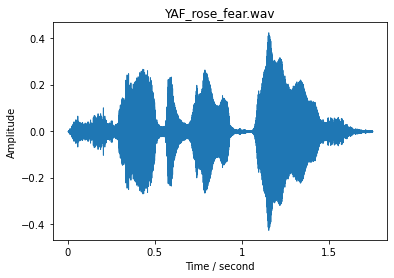

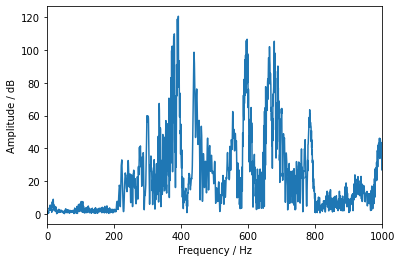

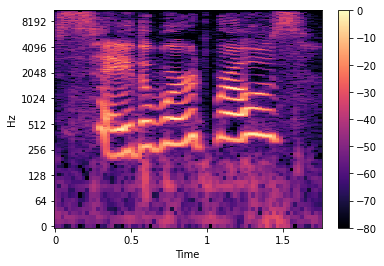

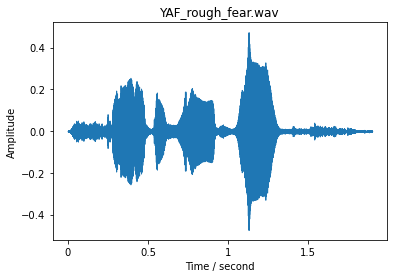

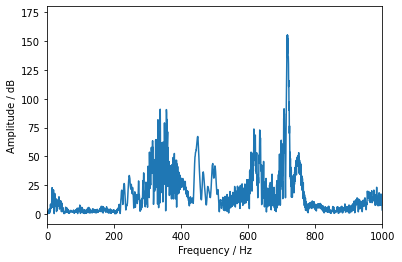

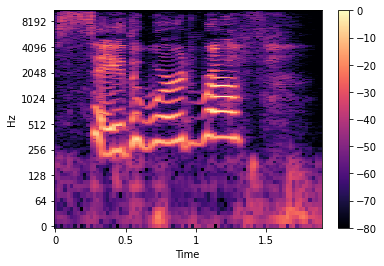

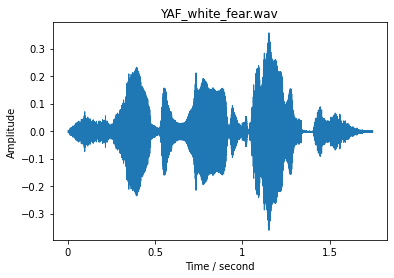

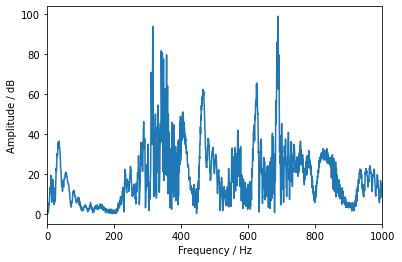

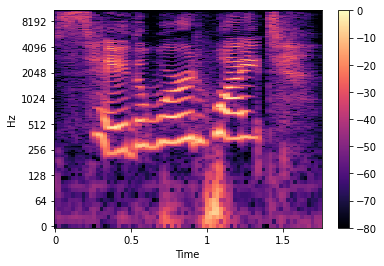

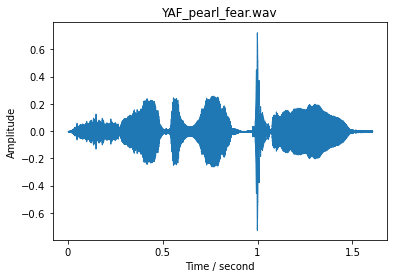

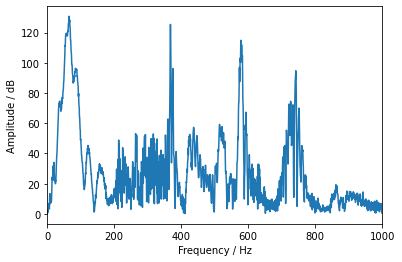

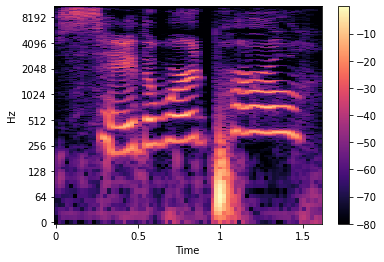

In [98]:
datafolder = "data_folder/fear/"
    
files = os.listdir(datafolder)
    
selection = random.sample(files, 4)

for i, file in enumerate(selection):
    
    signal, sample_rate = librosa.load(datafolder + file)

    plt.figure(i)
    librosa.display.waveshow(y=signal, sr=sample_rate)
    plt.xlabel('Time / second')
    plt.ylabel('Amplitude')
    plt.title(file)
    plt.show()
    
    k = np.arange(len(signal))
    T = len(signal)/sample_rate
    freq = k/T

    DATA_0 = np.fft.fft(signal)
    abs_DATA_0 = abs(DATA_0)
    plt.figure(i+1)
    plt.plot(freq, abs_DATA_0)
    plt.xlabel("Frequency / Hz")
    plt.ylabel("Amplitude / dB")
    plt.xlim([0, 1000])
    plt.show()
    
    D = librosa.stft(signal)
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    plt.figure(i + 2)
    librosa.display.specshow(S_db, x_axis='time', y_axis='log')
    plt.colorbar()
    plt.show()

In [99]:
# Fear Audio 1
signal, sample_rate = librosa.load(datafolder + selection[0])
Audio(data=signal, rate=sample_rate)

In [100]:
# Fear Audio 2
signal, sample_rate = librosa.load(datafolder + selection[1])
Audio(data=signal, rate=sample_rate)

In [101]:
# Fear Audio 3
signal, sample_rate = librosa.load(datafolder + selection[2])
Audio(data=signal, rate=sample_rate)

In [102]:
# Fear Audio 4
signal, sample_rate = librosa.load(datafolder + selection[3])
Audio(data=signal, rate=sample_rate)

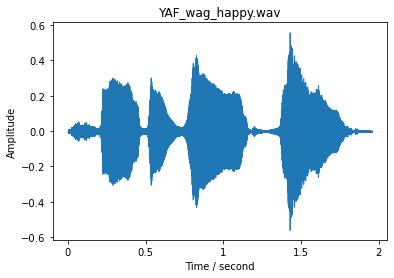

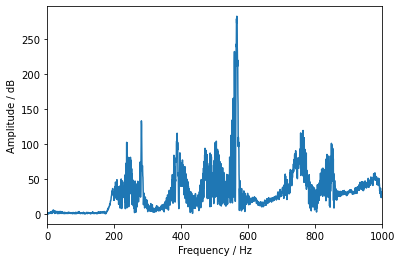

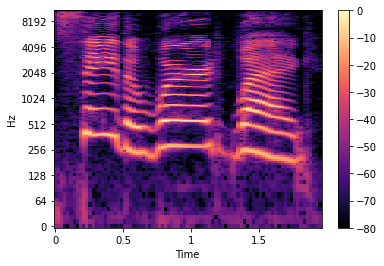

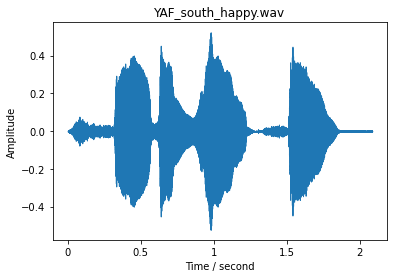

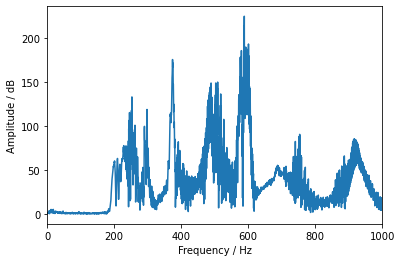

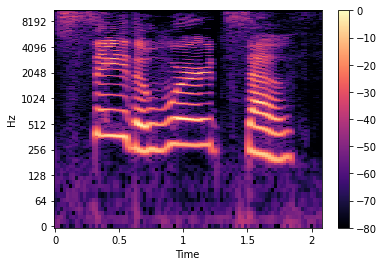

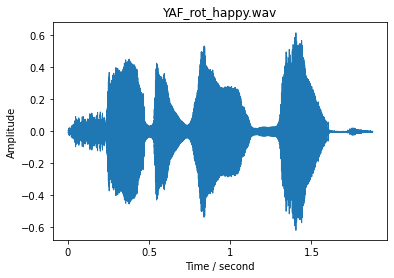

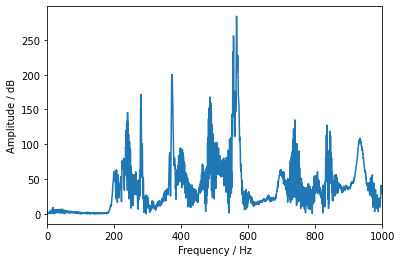

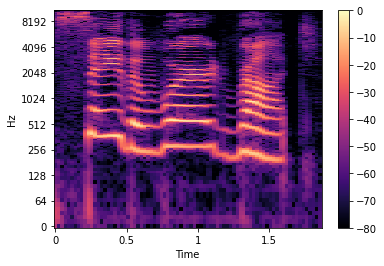

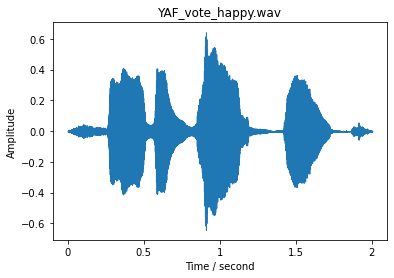

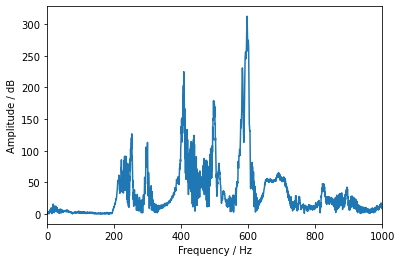

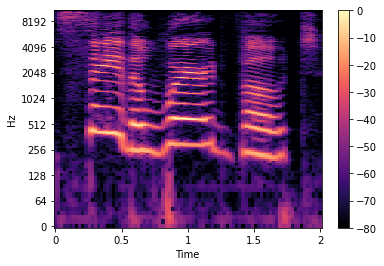

In [104]:
datafolder = "data_folder/happy/"
    
files = os.listdir(datafolder)
    
selection = random.sample(files, 4)

for i, file in enumerate(selection):
    
    signal, sample_rate = librosa.load(datafolder + file)

    plt.figure(i)
    librosa.display.waveshow(y=signal, sr=sample_rate)
    plt.xlabel('Time / second')
    plt.ylabel('Amplitude')
    plt.title(file)
    plt.show()
    
    k = np.arange(len(signal))
    T = len(signal)/sample_rate
    freq = k/T

    DATA_0 = np.fft.fft(signal)
    abs_DATA_0 = abs(DATA_0)
    plt.figure(i+1)
    plt.plot(freq, abs_DATA_0)
    plt.xlabel("Frequency / Hz")
    plt.ylabel("Amplitude / dB")
    plt.xlim([0, 1000])
    plt.show()
    
    D = librosa.stft(signal)
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    plt.figure(i + 2)
    librosa.display.specshow(S_db, x_axis='time', y_axis='log')
    plt.colorbar()
    plt.show()

In [105]:
# Happy Audio 1
signal, sample_rate = librosa.load(datafolder + selection[0])
Audio(data=signal, rate=sample_rate)

In [106]:
# Happy Audio 2
signal, sample_rate = librosa.load(datafolder + selection[1])
Audio(data=signal, rate=sample_rate)

In [107]:
# Happy Audio 3
signal, sample_rate = librosa.load(datafolder + selection[2])
Audio(data=signal, rate=sample_rate)

In [108]:
# Happy Audio 4
signal, sample_rate = librosa.load(datafolder + selection[3])
Audio(data=signal, rate=sample_rate)

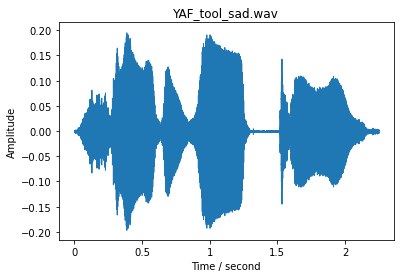

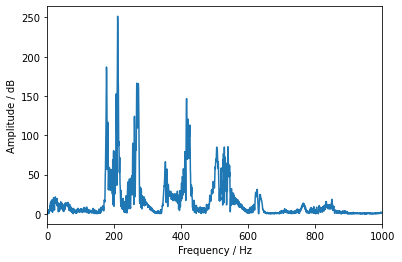

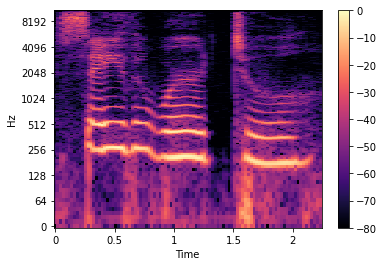

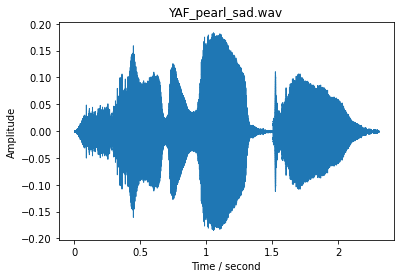

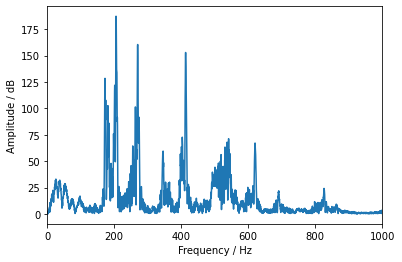

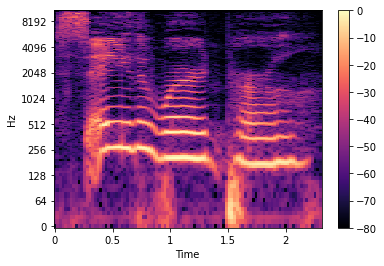

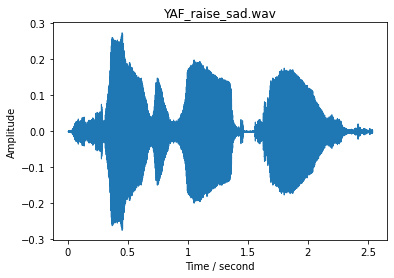

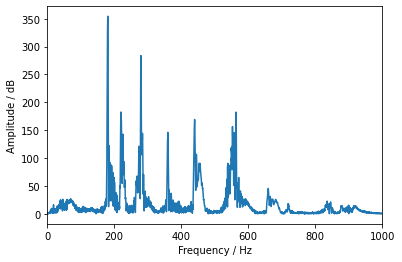

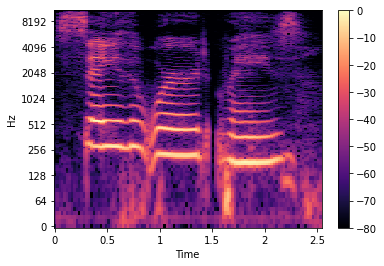

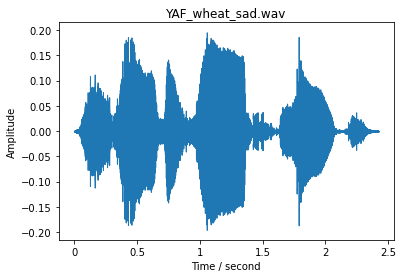

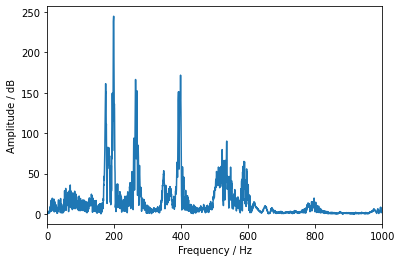

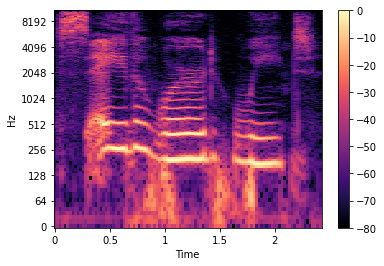

In [110]:
datafolder = "data_folder/sad/"
    
files = os.listdir(datafolder)
    
selection = random.sample(files, 4)

for i, file in enumerate(selection):
    
    signal, sample_rate = librosa.load(datafolder + file)

    plt.figure(i)
    librosa.display.waveshow(y=signal, sr=sample_rate)
    plt.xlabel('Time / second')
    plt.ylabel('Amplitude')
    plt.title(file)
    plt.show()
    
    k = np.arange(len(signal))
    T = len(signal)/sample_rate
    freq = k/T

    DATA_0 = np.fft.fft(signal)
    abs_DATA_0 = abs(DATA_0)
    plt.figure(i+1)
    plt.plot(freq, abs_DATA_0)
    plt.xlabel("Frequency / Hz")
    plt.ylabel("Amplitude / dB")
    plt.xlim([0, 1000])
    plt.show()
    
    D = librosa.stft(signal)
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    plt.figure(i + 2)
    librosa.display.specshow(S_db, x_axis='time', y_axis='log')
    plt.colorbar()
    plt.show()

In [111]:
# Sad Audio 1
signal, sample_rate = librosa.load(datafolder + selection[0])
Audio(data=signal, rate=sample_rate)

In [112]:
# Sad Audio 2
signal, sample_rate = librosa.load(datafolder + selection[1])
Audio(data=signal, rate=sample_rate)

In [113]:
# Sad Audio 3
signal, sample_rate = librosa.load(datafolder + selection[2])
Audio(data=signal, rate=sample_rate)

In [114]:
# Sad Audio 4
signal, sample_rate = librosa.load(datafolder + selection[3])
Audio(data=signal, rate=sample_rate)

# Step 3: Acoustic Feature Extraction

### Going to extract three sets of features to evaluate effectiveness of each

In [240]:
import pandas as pd

import audb
import audiofile
import opensmile

In [241]:
files = os.listdir('train')

openSmile1List = []
openSmile2List = []
librosaFeatList = []

### The first set of features are opensmile's Functionals
#### Taken over the entire range of the audio

In [242]:
featureSet1 = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,
)
featureSet1.feature_names

['F0semitoneFrom27.5Hz_sma3nz_amean',
 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
 'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
 'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope',
 'loudness_sma3_amean',
 'loudness_sma3_stddevNorm',
 'loudness_sma3_percentile20.0',
 'loudness_sma3_percentile50.0',
 'loudness_sma3_percentile80.0',
 'loudness_sma3_pctlrange0-2',
 'loudness_sma3_meanRisingSlope',
 'loudness_sma3_stddevRisingSlope',
 'loudness_sma3_meanFallingSlope',
 'loudness_sma3_stddevFallingSlope',
 'spectralFlux_sma3_amean',
 'spectralFlux_sma3_stddevNorm',
 'mfcc1_sma3_amean',
 'mfcc1_sma3_stddevNorm',
 'mfcc2_sma3_amean',
 'mfcc2_sma3_stddevNorm',
 'mfcc3_sma3_amean',
 'mfcc3_sma3_stddevNorm',
 'mfcc4_

In [243]:
for file_name in files:
    signal, sample_rate = audiofile.read('train/' + file_name)

    openSmile1List.append(featureSet1.process_signal(signal, sample_rate))

### The second set of features are opensmile's LowLevelDescriptors
#### Window Size approximately: 20 centiseconds
#### Hop Size Approximately: 10 centiseconds

In [244]:
featureSet2 = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.LowLevelDescriptors, 
)
featureSet2.feature_names

['Loudness_sma3',
 'alphaRatio_sma3',
 'hammarbergIndex_sma3',
 'slope0-500_sma3',
 'slope500-1500_sma3',
 'spectralFlux_sma3',
 'mfcc1_sma3',
 'mfcc2_sma3',
 'mfcc3_sma3',
 'mfcc4_sma3',
 'F0semitoneFrom27.5Hz_sma3nz',
 'jitterLocal_sma3nz',
 'shimmerLocaldB_sma3nz',
 'HNRdBACF_sma3nz',
 'logRelF0-H1-H2_sma3nz',
 'logRelF0-H1-A3_sma3nz',
 'F1frequency_sma3nz',
 'F1bandwidth_sma3nz',
 'F1amplitudeLogRelF0_sma3nz',
 'F2frequency_sma3nz',
 'F2bandwidth_sma3nz',
 'F2amplitudeLogRelF0_sma3nz',
 'F3frequency_sma3nz',
 'F3bandwidth_sma3nz',
 'F3amplitudeLogRelF0_sma3nz']

In [245]:
for file_name in files:
    signal, sample_rate = audiofile.read('train/' + file_name)

    openSmile2List.append(featureSet2.process_signal(signal, sample_rate))

### The third set of features are collected using the librosa library
#### Window Size approximately: 25ms
#### Hop Size Approximately: 10ms

In [246]:
librosaFeatList = []
window_size = int(22050 * 0.0025) ## Number of samples in 25ms
hop_size = int(22050 * 0.0010) ## Number of samples in 10ms

files = os.listdir('train')

In [247]:
# Loudness (0)
librosa_loudness = []

for file_name in files:
    data = pd.DataFrame()
    signal, sample_rate = librosa.load('train/' + file_name)
    
    rms = librosa.feature.rms(y=signal, frame_length=window_size, hop_length=hop_size)
    data['loudness'] = rms[0]
    
    librosa_loudness.append(data)

librosaFeatList.append(librosa_loudness)

In [248]:
# Mel-Frequency 12 Cepstral Coefficients (1)
librosa_mfcc = []

for file_name in files:
    data = pd.DataFrame()
    signal, sample_rate = librosa.load('train/' + file_name)
    
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12, hop_length =hop_size, win_length=window_size)
    
    for n_mfcc in range(len(mfccs)):
        data['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
    
    librosa_mfcc.append(data)

librosaFeatList.append(librosa_mfcc)

In [249]:
#Zero Crossing Rate (2)
librosa_zero_crossing_rate = []

for file_name in files:
    data = pd.DataFrame()
    signal, sample_rate = librosa.load('train/' + file_name)
    
    zcr = librosa.feature.zero_crossing_rate(y=signal, hop_length=hop_size, frame_length=window_size)
    
    data['ZCR'] = zcr[0]
    
    librosa_zero_crossing_rate.append(data)
    
librosaFeatList.append(librosa_zero_crossing_rate)

In [250]:
#Chroma (3)
librosa_chroma = []

for file_name in files:
    data = pd.DataFrame()
    signal, sample_rate = librosa.load('train/' + file_name)
    
    chromagram = librosa.feature.chroma_stft(y=signal, sr=sample_rate, hop_length=hop_size, win_length=window_size)
    
    for n_chroma in range(len(chromagram)):
        data['Chroma_%d'%(n_chroma+1)] = chromagram.T[n_chroma]
        
    librosa_chroma.append(data)

librosaFeatList.append(librosa_chroma)

In [251]:
# Mel Spectrogram (4)
librosa_mel_spectrogram = []

for file_name in files:
    data = pd.DataFrame()
    signal, sample_rate = librosa.load('train/' + file_name)
    
    mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12, hop_length=hop_size, win_length=window_size)
    
    for n_mel in range(len(mel_spectrogram)):
        data['Mel_Spectrogram_%d'%(n_mel+1)] = mel_spectrogram.T[n_mel]
        
    librosa_mel_spectrogram.append(data)
    
librosaFeatList.append(librosa_mel_spectrogram)

In [252]:
# Audio 1's Loudness Features
librosaFeatList[0][0]

loudness
0     0.000167
1     0.000257
2     0.000326
3     0.000401
4     0.000526
...        ...
2335  0.000741
2336  0.000684
2337  0.000632
2338  0.000653
2339  0.000576

[2340 rows x 1 columns]

In [253]:
# Audio 1's MFCC Features
librosaFeatList[1][0]

MFCC_1      MFCC_2      MFCC_3      MFCC_4      MFCC_5      MFCC_6  \
0  -836.949768 -782.585815 -764.137939 -744.065552 -733.565857 -732.000244   
1    11.084579   30.051519   19.707409   19.393097    5.729422  -22.076115   
2    14.691203   17.241598    1.732884  -15.207771  -47.322884  -40.671497   
3    11.707529   13.221351   25.646441   26.975859   -5.886238   22.217913   
4     4.957300  -14.511858   -3.358304    2.270686  -11.321764   15.928688   
5    10.389996   14.648106   10.817720   19.644474   -1.329373   33.734257   
6    -2.988074   -1.878193  -20.456905   -2.087632  -18.872791   -6.674448   
7     0.855226    4.378548  -10.053048    7.649559   31.359655   -8.912311   
8    -1.612123   19.171791    3.698128  -11.799074    9.824066   18.464359   
9    -1.217856   -5.402525   -2.624630  -24.498276    3.495617    3.603544   
10    0.554230  -13.996271   12.660635   -0.110786    2.161761  -19.104128   
11   -3.803636    6.668166    9.516094   16.303955    3.049761    0.255781   

        MFCC_7      MFCC_8      MFCC_9     MFCC_10     MFCC_11     MFCC_12  
0  -716.929626 -695.808533 -664.681396 -660.227295 -653.110291 -683.419312  
1    12.092808   17.057587   26.744661   37.020710    9.710108   -3.895342  
2   -28.379108  -38.771149  -33.882240  -34.100655  -27.954468  -33.802437  
3    15.123680   26.537018   34.572620   10.155134   26.987078   23.923447  
4    23.939852   28.503120   10.229037   12.253835   -1.219577    0.769803  
5    21.540798   35.761467    4.874127   23.851871   22.672623    7.039771  
6   -35.539154  -19.053753  -20.366764  -13.520568   -6.359089    1.950366  
7     6.327677    9.296660   10.683568   -2.949240   -3.615503   19.425930  
8    17.452377   13.328489    9.428679   -0.664362   -0.819966   -7.461691  
9     3.926083   -7.774719   -8.902046   12.826803   13.671489    1.019879  
10  -14.151154    2.798378   -0.626976   -6.988578   -6.842331  -16.149368  
11    9.666876  -14.946290   -1.968970   -5.409295  -12.435081    3.863995

In [254]:
# Audio 1's Zero Crossing Rate
librosaFeatList[2][0]

ZCR
0     0.236364
1     0.400000
2     0.345455
3     0.309091
4     0.327273
...        ...
2335  0.218182
2336  0.254545
2337  0.200000
2338  0.200000
2339  0.109091

[2340 rows x 1 columns]

In [255]:
# Audio 1's Chroma Features
librosaFeatList[3][0]

Chroma_1  Chroma_2  Chroma_3  Chroma_4  Chroma_5  Chroma_6  Chroma_7  \
0   0.570098  1.000000  0.999012  0.922465  1.000000  1.000000  1.000000   
1   0.574271  0.909700  0.989993  1.000000  0.812503  0.815849  0.861148   
2   0.474539  0.628331  0.960058  0.974031  0.618161  0.499985  0.538711   
3   0.398532  0.436899  1.000000  0.822371  0.570348  0.249728  0.303637   
4   0.499806  0.301768  0.994105  0.602733  0.539321  0.235177  0.160787   
5   0.781677  0.287850  0.760961  0.534357  0.573161  0.322390  0.117478   
6   1.000000  0.421700  0.552728  0.550687  0.641800  0.317417  0.179094   
7   0.932370  0.371741  0.622348  0.407466  0.582235  0.371492  0.345249   
8   0.646377  0.392697  0.601104  0.243763  0.595579  0.572657  0.490019   
9   0.413502  0.447552  0.393938  0.245920  0.675779  0.788015  0.658250   
10  0.377445  0.554498  0.463795  0.370269  0.849402  0.899854  0.805934   
11  0.468805  0.792401  0.780763  0.638998  0.985809  0.992305  0.919505   

    Chroma_8  Chroma_9  Chroma_10  Chroma_11  Chroma_12  
0   0.895505  1.000000   0.755139   0.620963   0.861644  
1   0.675983  0.918990   0.447618   0.423217   0.695445  
2   0.418445  0.675627   0.225617   0.267763   0.468597  
3   0.258717  0.465587   0.215984   0.231453   0.312271  
4   0.296692  0.432941   0.391425   0.301931   0.283023  
5   0.486303  0.528043   0.573676   0.492237   0.395254  
6   0.569189  0.414506   0.720882   0.774205   0.660036  
7   0.494885  0.235567   0.767429   1.000000   0.776458  
8   0.543710  0.290278   0.831250   0.943214   0.801311  
9   0.739091  0.457713   0.942688   0.776843   0.971595  
10  0.941170  0.680093   1.000000   0.743649   1.000000  
11  1.000000  0.891992   0.952034   0.724360   0.926717

In [256]:
# Audio 1's Mel Spectrogram Features
librosaFeatList[4][0]

Mel_Spectrogram_1  Mel_Spectrogram_2  Mel_Spectrogram_3  \
0        1.254135e-07       5.636522e-07       5.103321e-07   
1        6.595135e-08       2.425697e-07       4.913325e-07   
2        1.949135e-08       2.469752e-07       2.683085e-07   
3        9.809451e-09       2.359744e-07       5.652701e-08   
4        2.694080e-08       6.948791e-08       2.401387e-07   
5        3.305110e-08       9.410626e-08       2.385175e-07   
6        1.198340e-08       8.031023e-08       3.057330e-07   
7        6.681666e-09       2.490852e-08       1.832838e-07   
8        2.194026e-08       2.692049e-07       3.834214e-07   
9        4.236355e-08       2.545140e-07       4.443265e-07   
10       5.149915e-08       9.915041e-08       1.741870e-07   
11       3.439151e-09       2.974797e-08       4.888388e-08   

    Mel_Spectrogram_4  Mel_Spectrogram_5  Mel_Spectrogram_6  \
0        7.495196e-07       6.471053e-08       2.154104e-07   
1        4.480297e-07       2.256326e-07       5.837325e-08   
2        1.064635e-07       8.401676e-07       5.173113e-08   
3        4.092821e-07       1.108616e-06       1.649124e-07   
4        6.015742e-07       4.719905e-07       8.124907e-07   
5        3.015565e-07       1.616841e-06       4.311077e-06   
6        9.089991e-07       1.986439e-06       2.403954e-06   
7        4.300417e-07       8.547814e-07       4.576964e-07   
8        4.458087e-07       2.810623e-07       1.472520e-06   
9        5.080597e-07       3.725772e-07       1.589978e-06   
10       2.573915e-07       4.675285e-07       3.967852e-07   
11       4.393413e-08       9.213571e-08       2.582571e-07   

    Mel_Spectrogram_7  Mel_Spectrogram_8  Mel_Spectrogram_9  \
0        6.700207e-07       1.999142e-06       2.826870e-06   
1        3.426931e-07       3.668594e-07       1.759780e-06   
2        2.676451e-07       1.957614e-07       1.119624e-06   
3        2.031154e-07       4.304595e-07       8.917869e-07   
4        7.819607e-07       1.892453e-06       1.055575e-06   
5        5.946850e-06       9.719683e-06       7.975306e-06   
6        6.081194e-06       7.206850e-06       1.360188e-05   
7        5.270647e-07       9.688058e-07       2.919289e-06   
8        4.737365e-07       4.681281e-07       1.419678e-06   
9        5.507128e-07       1.584219e-06       2.223269e-06   
10       6.223038e-07       1.206515e-06       1.491888e-06   
11       1.903999e-07       8.883308e-08       1.389517e-07   

    Mel_Spectrogram_10  Mel_Spectrogram_11  Mel_Spectrogram_12  
0         3.132085e-06        2.384126e-06        6.650515e-07  
1         1.778126e-06        1.211758e-06        3.696577e-07  
2         1.299874e-06        8.740289e-07        3.689729e-07  
3         1.776562e-06        1.208603e-06        1.338307e-06  
4         5.764056e-06        2.678740e-06        1.305920e-06  
5         1.394081e-05        7.926327e-06        3.428222e-06  
6         5.532045e-06        3.677322e-06        4.918030e-06  
7         1.893611e-06        4.849536e-06        3.776565e-06  
8         1.692777e-06        4.250695e-06        3.269975e-06  
9         1.078521e-06        2.327494e-06        9.127123e-07  
10        1.003351e-06        2.586659e-06        1.583227e-06  
11        3.286225e-07        3.544886e-07        4.670480e-07

# Step 4: Feature Post-processing

### 1st Set Features

In [279]:
# Each element of the list are the linearized features
# Skip Averaging and concatenation

files = os.listdir('train')

columns = openSmile1List[0].columns
columns = columns.insert(0, 'Label')

openSmileDF1 = pd.DataFrame(columns = columns)

for i, file_name in enumerate(files):
    underscore = file_name.find('_')
    start = file_name.find('_', underscore + 1)
    end = file_name.find('.')
    label = file_name[start+1:end]
    
    data = openSmile1List[i].values.flatten().tolist()
    data.insert(0, label)
    
    newrow = pd.Series(data, columns)
    openSmileDF1 = pd.concat([openSmileDF1, newrow.to_frame().T], ignore_index=True)

openSmileDF1

Label F0semitoneFrom27.5Hz_sma3nz_amean  \
0    angry                         41.474937   
1      sad                         35.085842   
2    angry                         38.193565   
3     fear                         43.439865   
4    angry                         37.472275   
..     ...                               ...   
275  happy                         39.223255   
276  angry                           39.0191   
277  happy                         39.800625   
278  happy                          38.92313   
279  happy                         39.428562   

    F0semitoneFrom27.5Hz_sma3nz_stddevNorm  \
0                                 0.181776   
1                                 0.095317   
2                                 0.105696   
3                                 0.070929   
4                                 0.177803   
..                                     ...   
275                               0.098906   
276                               0.113673   
277                               0.104032   
278                               0.098915   
279                               0.090884   

    F0semitoneFrom27.5Hz_sma3nz_percentile20.0  \
0                                    36.798668   
1                                    32.171967   
2                                    35.177902   
3                                    40.004208   
4                                     36.10376   
..                                         ...   
275                                  35.550041   
276                                   35.81295   
277                                   36.83519   
278                                  35.187317   
279                                  35.779919   

    F0semitoneFrom27.5Hz_sma3nz_percentile50.0  \
0                                    38.290947   
1                                    35.111145   
2                                    37.386074   
3                                    43.265778   
4                                    37.627136   
..                                         ...   
275                                  37.910763   
276                                  37.997524   
277                                  40.378174   
278                                  37.832706   
279                                  38.652035   

    F0semitoneFrom27.5Hz_sma3nz_percentile80.0  \
0                                    45.238041   
1                                    39.317539   
2                                     40.35178   
3                                    46.103001   
4                                    41.047607   
..                                         ...   
275                                  42.180878   
276                                  40.945229   
277                                    41.7383   
278                                  40.990616   
279                                  41.602253   

    F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2  \
0                                   8.439373   
1                                   7.145573   
2                                   5.173878   
3                                   6.098793   
4                                   4.943848   
..                                       ...   
275                                 6.630836   
276                                 5.132278   
277                                 4.903111   
278                                 5.803299   
279                                 5.822334   

    F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope  \
0                                    437.837341   
1                                    101.693916   
2                                    119.816887   
3                                    271.096405   
4                                    229.004333   
..                                          ...   
275                                    29.74687   
276                                   47.919064   
277                                 

In [258]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0,1)) # Scales values between 0 and 1

# Scaling Values
for column in openSmileDF1.columns[1:]:
    openSmileDF1[[column]] = scaler.fit_transform(openSmileDF1[[column]])
    
openSmileDF1

Label  F0semitoneFrom27.5Hz_sma3nz_amean  \
0    angry                           0.761397   
1      sad                           0.272306   
2    angry                           0.510205   
3     fear                           0.911814   
4    angry                           0.454990   
..     ...                                ...   
275  happy                           0.589029   
276  angry                           0.573401   
277  happy                           0.633227   
278  happy                           0.566054   
279  happy                           0.604745   

     F0semitoneFrom27.5Hz_sma3nz_stddevNorm  \
0                                  0.625927   
1                                  0.215309   
2                                  0.264598   
3                                  0.099480   
4                                  0.607061   
..                                      ...   
275                                0.232354   
276                                0.302486   
277                                0.256697   
278                                0.232393   
279                                0.194253   

     F0semitoneFrom27.5Hz_sma3nz_percentile20.0  \
0                                      0.773101   
1                                      0.537719   
2                                      0.690645   
3                                      0.936182   
4                                      0.737748   
..                                          ...   
275                                    0.709578   
276                                    0.722953   
277                                    0.774959   
278                                    0.691124   
279                                    0.721273   

     F0semitoneFrom27.5Hz_sma3nz_percentile50.0  \
0                                      0.448865   
1                                      0.180725   
2                                      0.372560   
3                                      0.868372   
4                                      0.392888   
..                                          ...   
275                                    0.416805   
276                                    0.424122   
277                                    0.624872   
278                                    0.410223   
279                                    0.479314   

     F0semitoneFrom27.5Hz_sma3nz_percentile80.0  \
0                                      0.644315   
1                                      0.167851   
2                                      0.251084   
3                                      0.713924   
4                                      0.307082   
..                                          ...   
275                                    0.398284   
276                                    0.298842   
277                                    0.362666   
278                                    0.302495   
279                                    0.351718   

     F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2  \
0                                    0.413776   
1                                    0.320894   
2                                    0.179345   
3                                    0.245745   
4                                    0.162831   
..                                        ...   
275                                  0.283941   
276                                  0.176359   
277                                  0.159906   
278                                  0.224531   
279                                  0.225898   

     F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope  \
0                                       0.262502   
1                                       0.103348   
2                                       0.111929   
3                                       0.183555   
4                                       0.163625   
..                                           ...   
275                                     0.069283   
276    

### 2nd Set of Features

In [259]:
# Each audio file has a dataframe in the list
# Values need to be averaged, concatenated, and scaled

files = os.listdir('train')

openSmileDF2 = pd.DataFrame()

for k, file_name in enumerate(files):
    underscore = file_name.find('_')
    start = file_name.find('_', underscore + 1)
    end = file_name.find('.')
    label = file_name[start+1:end]
    
    ## add rows of zero until divisible by zero
    num = 10 - openSmile2List[k].index.size % 10 
    for i in range(num):
        openSmile2List[k] = pd.concat([openSmile2List[k], pd.Series(0, index=openSmile2List[k].columns).to_frame().T], ignore_index=True)
    
    ## array to store averaged linear feature vector
    concat = np.empty(int(openSmile2List[k].index.size/10) * openSmile2List[k].columns.size)
    index = 0
    for i in range (0, openSmile2List[k].index.size - 9, 10): ## moves down the rows, in groups of ten
        for j in range (openSmile2List[k].columns.size): ## moves across the columns
            concat[index] = openSmile2List[k].iloc[i:i+10, j:j+1].mean() ## Average every ten frames together
            index += 1
    
    l = list(concat)
    l.insert(0, label)
    concat = np.array(l)
    data = pd.Series(concat).to_frame().T
    
    openSmileDF2 = pd.concat([openSmileDF2, data], ignore_index=True)
    
openSmileDF2

0                    1                    2                    3    \
0    angry  0.23055350333452224   12.411966896057129   -7.977826690673828   
1      sad  0.13068293333053588  -0.6516819000244141     4.88749930858612   
2    angry   0.3203382700681686   10.095810985565185   -4.522087450698018   
3     fear  0.28782814294099807    4.674483290314674   2.7564626529812815   
4    angry  0.25630301982164383   10.896420669555663   -5.559892749786377   
..     ...                  ...                  ...                  ...   
275  happy  0.15893535688519478    2.451812729239464    3.753109896183014   
276  angry   0.2029445916414261   12.089811038970947   -7.319010519981385   
277  happy  0.14182854667305947   4.5882907032966616   2.5632236003875732   
278  happy  0.18255598843097687   3.6280073702335356   1.6059747621417046   
279  happy  0.16979938223958016    6.117664813995361  -2.6742934703826906   

                        4                        5                     6    \
0      -0.01443852427546517   -0.0020531655580271037  0.024261083314195277   
1      -0.04671993739902973    -0.006458008571644314  0.017229666037019344   
2    -0.0001898626796901226     -0.00572127215564251  0.041441775020211936   
3       -0.0476379188708961    0.0003284532926045358  0.044318053591996434   
4     -0.020971632236614822    0.0024789220187813044    0.0331876901909709   
..                      ...                      ...                   ...   
275    -0.03471962548792362    -0.007406356418505311  0.016202213196083903   
276   -0.012832288094796241  -0.00030834800854790957  0.019009786192327738   
277   -0.034990692511200905    0.0010491283534065587  0.013369546248577535   
278   -0.035842427890747784   -0.0017506944481283427  0.020793896820396184   
279  -0.0068177841972101305    -0.008132781274616719   0.01333940839394927   

                     7                   8                    9    ...  616  \
0     -30.61111364364624   17.70429031252861  -13.590812253952027  ...  NaN   
1    -14.276759839057922   27.18166937828064   2.9351382866501807  ...  NaN   
2    -25.449202632904054  19.798896312713623   -9.943474585562944  ...  NaN   
3    -21.674055576324463  15.144700145721435   -6.226513975858689  ...  NaN   
4    -29.366958999633788   19.45915961265564  -13.923594903945922  ...  NaN   
..                   ...                 ...                  ...  ...  ...   
275  -16.703170490264892  17.569424152374268   1.3179706811904908  ...  NaN   
276  -29.206252670288087   21.86468372344971   -13.10107575058937  ...  NaN   
277  -19.889698123931886  14.649066734313966   -6.080877900123596  ...  NaN   
278  -18.861831855773925  18.704729747772216  -2.6015674471855164  ...  NaN   
279  -19.935098075866698  20.717005348205568   -9.250916108489037  ...  NaN   

     617  618  619  620  621  622  623  624  625  
0    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  
275  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
276  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
277  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
278  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
279  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[280 rows x 626 columns]

In [260]:
# Scaling Values
for column in openSmileDF2.columns[1:]:
    openSmileDF2[[column]] = scaler.fit_transform(openSmileDF2[[column]])

# Feature Padding
openSmileDF2.fillna(0.0, inplace = True)
openSmileDF2

0         1         2         3         4         5         6    \
0    angry  0.430993  0.877616  0.129447  0.650223  0.615176  0.190588   
1      sad  0.069455  0.368608  0.599739  0.393813  0.452431  0.089884   
2    angry  0.756020  0.787370  0.255771  0.763400  0.479651  0.436651   
3     fear  0.638331  0.576135  0.521839  0.386521  0.703169  0.477845   
4    angry  0.524208  0.818565  0.217834  0.598331  0.782622  0.318435   
..     ...       ...       ...       ...       ...       ...       ...   
275  happy  0.171730  0.489532  0.558271  0.489131  0.417392  0.075169   
276  angry  0.331047  0.865064  0.153530  0.662981  0.679641  0.115379   
277  happy  0.109802  0.572777  0.514775  0.486978  0.729796  0.034600   
278  happy  0.257239  0.535361  0.479783  0.480212  0.626351  0.140931   
279  happy  0.211059  0.632367  0.323318  0.710754  0.390553  0.034168   

          7         8         9    ...  616  617  618  619  620  621  622  \
0    0.112673  0.290188  0.165981  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1    0.659493  0.592398  0.676620  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2    0.285477  0.356980  0.278681  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3    0.411856  0.208569  0.393532  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4    0.154323  0.346146  0.155699  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
..        ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
275  0.578265  0.285887  0.626650  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
276  0.159703  0.422852  0.181114  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
277  0.471590  0.192764  0.398032  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
278  0.506000  0.322089  0.505540  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
279  0.470070  0.386256  0.300080  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     623  624  625  
0    0.0  0.0  0.0  
1    0.0  0.0  0.0  
2    0.0  0.0  0.0  
3    0.0  0.0  0.0  
4    0.0  0.0  0.0  
..   ...  ...  ...  
275  0.0  0.0  0.0  
276  0.0  0.0  0.0  
277  0.0  0.0  0.0  
278  0.0  0.0  0.0  
279  0.0  0.0  0.0  

[280 rows x 626 columns]

### 3nd Set of Features

In [261]:
# Each audio file has multiple dataframes in the librosa list
# Values need to be averaged, concatenated, and scaled

files = os.listdir('train')

librosaDF = pd.DataFrame()

# Need to find the longest feature because loudness
# and zero crossing rate need to be padded
max = 0
for i in range(280):
    current = librosaFeatList[0][i].index.size
    if current > max:
        max = current

max = max + 10 - max % 10
max

2520

In [265]:
for k, file_name in enumerate(files):
    underscore = file_name.find('_')
    start = file_name.find('_', underscore + 1)
    end = file_name.find('.')
    label = file_name[start+1:end]
    
    # Loudness
    loudness = np.empty(int(max/10))
    
    ## add rows until the number of rows equal max
    for i in range(max - librosaFeatList[0][k].index.size):
        librosaFeatList[0][k] = pd.concat([librosaFeatList[0][k], pd.Series(0.0, index=librosaFeatList[0][k].columns).to_frame().T], ignore_index=True)
    
    index = 0
    for i in range (0, librosaFeatList[0][k].index.size - 9, 10): ## moves down the rows, in groups of ten
            loudness[index] = librosaFeatList[0][k].iloc[i:i+10, :].mean() ## Average every ten frames together
            index += 1
    
    # MFCC
    mfcc = np.empty(72)
    
    index = 0
    for i in range (0, librosaFeatList[1][k].index.size - 1, 2): ## moves down the rows, in groups of 2
        for j in range (librosaFeatList[1][k].columns.size): ## moves across the columns
            mfcc[index] = librosaFeatList[1][k].iloc[i:i+2, j:j+1].mean() ## Average every 2 cells together
            index += 1
    
    
    # Zero crossing rate
    zcr = np.empty(int(max/10))
    
    for i in range(max - librosaFeatList[2][k].index.size):
        librosaFeatList[2][k] = pd.concat([librosaFeatList[2][k], pd.Series(0.0, index=librosaFeatList[2][k].columns).to_frame().T], ignore_index=True)
    index = 0
    for i in range (0, librosaFeatList[2][k].index.size - 9, 10): ## moves down the rows, in groups of ten
            zcr[index] = librosaFeatList[2][k].iloc[i:i+10, :].mean() ## Average every ten frames together
            index += 1
    
    # Chroma
    chroma = np.empty(72)
    
    index = 0
    for i in range (0, librosaFeatList[3][k].index.size - 1, 2): ## moves down the rows, in groups of 2
        for j in range (librosaFeatList[3][k].columns.size): ## moves across the columns
            chroma[index] = librosaFeatList[3][k].iloc[i:i+2, j:j+1].mean() ## Average every 2 cells together
            index += 1
    # Mel
    mel = np.empty(72)
    
    index = 0
    for i in range (0, librosaFeatList[4][k].index.size - 1, 2): ## moves down the rows, in groups of 2
        for j in range (librosaFeatList[4][k].columns.size): ## moves across the columns
            mel[index] = librosaFeatList[4][k].iloc[i:i+2, j:j+1].mean() ## Average every 2 cells together
            index += 1
    
    l = list(loudness) + list(mfcc) + list(zcr) + list(chroma) + list(mel)
    l.insert(0, label)
    concat = np.array(l)
    data = pd.Series(concat).to_frame().T
    
    librosaDF = pd.concat([librosaDF, data], ignore_index=True)
    
librosaDF

0                       1                      2    \
0    angry    0.000605659319262486  0.0013227442279458046   
1      sad   0.0002889734343625605  0.0005330944142770023   
2    angry   0.0005461588792968541  0.0016005243815016001   
3     fear   0.0008562775125028566   0.002703546977136284   
4    angry   0.0013125030614901333   0.003783549554646015   
..     ...                     ...                    ...   
275  happy  0.00038480674993479624  0.0013224467111285776   
276  angry   0.0007228582573588938   0.003188481950201094   
277  happy   0.0012123704014811664  0.0014453907147981226   
278  happy   0.0020413262187503277  0.0037821059580892325   
279  happy   0.0008395441458560526  0.0017371484311297536   

                       3                      4                     5    \
0    0.0026068363222293556  0.0053838285151869055  0.011220917012542487   
1    0.0005668835976393894  0.0007518162485212088  0.001691539224702865   
2     0.003585449396632612   0.007887712446972728    0.0184395520016551   
3     0.006538411695510149   0.013797071389853954  0.015077552758157253   
4     0.009697278868407011   0.018179058097302914  0.020051697548478842   
..                     ...                    ...                   ...   
275  0.0016985733062028884  0.0031203679041936993  0.006209610356017947   
276   0.007393194129690528     0.0124330491758883  0.016143497359007598   
277  0.0026779344538226725   0.005224085738882422   0.00858352668583393   
278   0.006719532003626227   0.009504324197769165  0.009557276125997305   
279   0.004635465494357049   0.008484852593392133  0.013187469355762005   

                       6                     7                      8    \
0     0.018875736091285945  0.021053447388112545    0.01974233575165272   
1    0.0033156721154227855  0.007624454144388437  0.0073770994786173105   
2     0.025089026615023612   0.03523493278771639     0.0343499694019556   
3     0.024357836320996286   0.01889699473977089   0.019706038665026425   
4     0.016579920146614312  0.040714898332953456    0.03666159249842167   
..                     ...                   ...                    ...   
275   0.010491526871919631  0.012523125670850278    0.01616307273507118   
276   0.019194147549569607  0.017394214402884245    0.01780331479385495   
277   0.009564841445535422  0.010175460297614337   0.012833081651479006   
278   0.013222863152623176  0.011013362742960452   0.013699476979672909   
279    0.01384376222267747   0.01701543414965272   0.018541944865137338   

                      9    ...                     711  \
0     0.02049265503883362  ...  1.1153543510999953e-07   
1    0.010286569781601428  ...  1.9398445516571883e-08   
2      0.0356876315549016  ...   4.164698808040157e-08   
3    0.020906894374638794  ...   8.608321877545677e-08   
4    0.021873354259878398  ...   8.442804073638399e-07   
..                    ...  ...                     ...   
275  0.013544800877571105  ...   1.099515785085714e-07   
276  0.014768023043870926  ...  1.3663904496752366e-07   
277  0.011280520260334015  ...  2.3633672299183672e-06   
278  0.014143492234870792  ...  1.9912095012841746e-06   
279  0.018422718718647958  ...  1.5070520476001548e-07   

                        712                     713                     714  \
0    1.5066281378040003e-07  2.7983210770798905e-07   3.275211497566488e-07   
1     4.600192227144362e-08   2.629774442652888e-08   4.548667931203454e-08   
2     5.204798725344517e-08  1.0736335553929166e-07   8.308194310302497e-08   
3     9.135426637385535e-08  1.4310353435575962e-07  2.8208245339556015e-07   
4    1.4397128325072117e-06  2.4940495677583385e-06  3.9668334466114175e-06   
..                      ...                     ...                     ...   
275   6.710858002634268e-08  3.8051101824976286e-08  1.0021881280408707e-07   
276   1.170173618447734e-06  2.4893600425457407e-07   2.749079044406244e-07   
277  1.8530998886490124e-06   2.972396714540082e-06  2.012104005

In [266]:
# Scaling Values
for column in librosaDF.columns[1:]:
    librosaDF[[column]] = scaler.fit_transform(librosaDF[[column]])

# Feature Padding
librosaDF.fillna(0.0, inplace = True)
librosaDF

0         1         2         3         4         5         6    \
0    angry  0.043887  0.055957  0.095353  0.162257  0.295491  0.451167   
1      sad  0.012174  0.014571  0.007684  0.000495  0.014111  0.041328   
2    angry  0.037928  0.070516  0.137410  0.249699  0.508640  0.614819   
3     fear  0.068983  0.128326  0.264317  0.456069  0.409368  0.595560   
4    angry  0.114669  0.184929  0.400073  0.609100  0.556243  0.390697   
..     ...       ...       ...       ...       ...       ...       ...   
275  happy  0.021771  0.055941  0.056320  0.083211  0.147519  0.230334   
276  angry  0.055623  0.153741  0.301052  0.408434  0.440843  0.459553   
277  happy  0.104642  0.062385  0.098409  0.156678  0.217615  0.205925   
278  happy  0.187653  0.184853  0.272101  0.306155  0.246367  0.302275   
279  happy  0.067308  0.077676  0.182536  0.270553  0.353558  0.318629   

          7         8         9    ...       711       712       713  \
0    0.437725  0.392744  0.277470  ...  0.000571  0.000776  0.000503   
1    0.112490  0.091123  0.081288  ...  0.000057  0.000193  0.000024   
2    0.781184  0.749063  0.569549  ...  0.000181  0.000227  0.000177   
3    0.385498  0.391858  0.285433  ...  0.000429  0.000446  0.000245   
4    0.913902  0.805449  0.304010  ...  0.004660  0.007956  0.004690   
..        ...       ...       ...  ...       ...       ...       ...   
275  0.231130  0.305436  0.143918  ...  0.000562  0.000311  0.000046   
276  0.349102  0.345446  0.167431  ...  0.000711  0.006454  0.000445   
277  0.174272  0.224209  0.100394  ...  0.013136  0.010258  0.005595   
278  0.194565  0.245342  0.155426  ...  0.011060  0.025987  0.014022   
279  0.339929  0.363463  0.237682  ...  0.000790  0.001491  0.002530   

          714       715       716       717       718       719       720  
0    0.000586  0.000828  0.002135  0.003595  0.000787  0.001695  0.000429  
1    0.000068  0.000171  0.000071  0.000072  0.000008  0.000002  0.000024  
2    0.000137  0.000137  0.002392  0.001707  0.000440  0.000654  0.000641  
3    0.000502  0.000443  0.004723  0.006186  0.002700  0.003369  0.000888  
4    0.007270  0.022499  0.016557  0.034556  0.008285  0.025026  0.010050  
..        ...       ...       ...       ...       ...       ...       ...  
275  0.000168  0.000185  0.000299  0.000343  0.000496  0.000377  0.000209  
276  0.000489  0.000738  0.001536  0.007518  0.003919  0.007672  0.002428  
277  0.003680  0.006604  0.016647  0.015940  0.002040  0.003405  0.001395  
278  0.008332  0.015784  0.055055  0.064997  0.013329  0.012302  0.007493  
279  0.001220  0.001159  0.008745  0.012386  0.009334  0.011514  0.007518  

[280 rows x 721 columns]

### Change Labels to 0- angry, 1-fear, 2-happy, 3-sad

In [280]:
openSmileDF1['Label'].mask(openSmileDF1['Label'] == 'angry', int(0), inplace=True)
openSmileDF1['Label'].mask(openSmileDF1['Label'] == 'fear', int(1), inplace=True)
openSmileDF1['Label'].mask(openSmileDF1['Label'] == 'happy', int(2), inplace=True)
openSmileDF1['Label'].mask(openSmileDF1['Label'] == 'sad', int(3), inplace=True)
openSmileDF1

Label F0semitoneFrom27.5Hz_sma3nz_amean  \
0       0                         41.474937   
1       3                         35.085842   
2       0                         38.193565   
3       1                         43.439865   
4       0                         37.472275   
..    ...                               ...   
275     2                         39.223255   
276     0                           39.0191   
277     2                         39.800625   
278     2                          38.92313   
279     2                         39.428562   

    F0semitoneFrom27.5Hz_sma3nz_stddevNorm  \
0                                 0.181776   
1                                 0.095317   
2                                 0.105696   
3                                 0.070929   
4                                 0.177803   
..                                     ...   
275                               0.098906   
276                               0.113673   
277                               0.104032   
278                               0.098915   
279                               0.090884   

    F0semitoneFrom27.5Hz_sma3nz_percentile20.0  \
0                                    36.798668   
1                                    32.171967   
2                                    35.177902   
3                                    40.004208   
4                                     36.10376   
..                                         ...   
275                                  35.550041   
276                                   35.81295   
277                                   36.83519   
278                                  35.187317   
279                                  35.779919   

    F0semitoneFrom27.5Hz_sma3nz_percentile50.0  \
0                                    38.290947   
1                                    35.111145   
2                                    37.386074   
3                                    43.265778   
4                                    37.627136   
..                                         ...   
275                                  37.910763   
276                                  37.997524   
277                                  40.378174   
278                                  37.832706   
279                                  38.652035   

    F0semitoneFrom27.5Hz_sma3nz_percentile80.0  \
0                                    45.238041   
1                                    39.317539   
2                                     40.35178   
3                                    46.103001   
4                                    41.047607   
..                                         ...   
275                                  42.180878   
276                                  40.945229   
277                                    41.7383   
278                                  40.990616   
279                                  41.602253   

    F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2  \
0                                   8.439373   
1                                   7.145573   
2                                   5.173878   
3                                   6.098793   
4                                   4.943848   
..                                       ...   
275                                 6.630836   
276                                 5.132278   
277                                 4.903111   
278                                 5.803299   
279                                 5.822334   

    F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope  \
0                                    437.837341   
1                                    101.693916   
2                                    119.816887   
3                                    271.096405   
4                                    229.004333   
..                                          ...   
275                                    29.74687   
276                                   47.919064   
277                                   30.985987

In [271]:
openSmileDF2[0].mask(openSmileDF2[0] == 'angry', 0, inplace=True)
openSmileDF2[0].mask(openSmileDF2[0] == 'fear', 1, inplace=True)
openSmileDF2[0].mask(openSmileDF2[0] == 'happy', 2, inplace=True)
openSmileDF2[0].mask(openSmileDF2[0] == 'sad', 3, inplace=True)
openSmileDF2

0         1         2         3         4         5         6         7    \
0     0  0.430993  0.877616  0.129447  0.650223  0.615176  0.190588  0.112673   
1     3  0.069455  0.368608  0.599739  0.393813  0.452431  0.089884  0.659493   
2     0  0.756020  0.787370  0.255771  0.763400  0.479651  0.436651  0.285477   
3     1  0.638331  0.576135  0.521839  0.386521  0.703169  0.477845  0.411856   
4     0  0.524208  0.818565  0.217834  0.598331  0.782622  0.318435  0.154323   
..   ..       ...       ...       ...       ...       ...       ...       ...   
275   2  0.171730  0.489532  0.558271  0.489131  0.417392  0.075169  0.578265   
276   0  0.331047  0.865064  0.153530  0.662981  0.679641  0.115379  0.159703   
277   2  0.109802  0.572777  0.514775  0.486978  0.729796  0.034600  0.471590   
278   2  0.257239  0.535361  0.479783  0.480212  0.626351  0.140931  0.506000   
279   2  0.211059  0.632367  0.323318  0.710754  0.390553  0.034168  0.470070   

          8         9    ...  616  617  618  619  620  621  622  623  624  625  
0    0.290188  0.165981  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1    0.592398  0.676620  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2    0.356980  0.278681  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3    0.208569  0.393532  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4    0.346146  0.155699  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
..        ...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
275  0.285887  0.626650  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
276  0.422852  0.181114  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
277  0.192764  0.398032  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
278  0.322089  0.505540  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
279  0.386256  0.300080  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[280 rows x 626 columns]

In [272]:
librosaDF[0].mask(librosaDF[0] == 'angry', int(0), inplace=True)
librosaDF[0].mask(librosaDF[0] == 'fear', int(1), inplace=True)
librosaDF[0].mask(librosaDF[0] == 'happy', int(2), inplace=True)
librosaDF[0].mask(librosaDF[0] == 'sad', int(3), inplace=True)
librosaDF

0         1         2         3         4         5         6         7    \
0     0  0.043887  0.055957  0.095353  0.162257  0.295491  0.451167  0.437725   
1     3  0.012174  0.014571  0.007684  0.000495  0.014111  0.041328  0.112490   
2     0  0.037928  0.070516  0.137410  0.249699  0.508640  0.614819  0.781184   
3     1  0.068983  0.128326  0.264317  0.456069  0.409368  0.595560  0.385498   
4     0  0.114669  0.184929  0.400073  0.609100  0.556243  0.390697  0.913902   
..   ..       ...       ...       ...       ...       ...       ...       ...   
275   2  0.021771  0.055941  0.056320  0.083211  0.147519  0.230334  0.231130   
276   0  0.055623  0.153741  0.301052  0.408434  0.440843  0.459553  0.349102   
277   2  0.104642  0.062385  0.098409  0.156678  0.217615  0.205925  0.174272   
278   2  0.187653  0.184853  0.272101  0.306155  0.246367  0.302275  0.194565   
279   2  0.067308  0.077676  0.182536  0.270553  0.353558  0.318629  0.339929   

          8         9    ...       711       712       713       714  \
0    0.392744  0.277470  ...  0.000571  0.000776  0.000503  0.000586   
1    0.091123  0.081288  ...  0.000057  0.000193  0.000024  0.000068   
2    0.749063  0.569549  ...  0.000181  0.000227  0.000177  0.000137   
3    0.391858  0.285433  ...  0.000429  0.000446  0.000245  0.000502   
4    0.805449  0.304010  ...  0.004660  0.007956  0.004690  0.007270   
..        ...       ...  ...       ...       ...       ...       ...   
275  0.305436  0.143918  ...  0.000562  0.000311  0.000046  0.000168   
276  0.345446  0.167431  ...  0.000711  0.006454  0.000445  0.000489   
277  0.224209  0.100394  ...  0.013136  0.010258  0.005595  0.003680   
278  0.245342  0.155426  ...  0.011060  0.025987  0.014022  0.008332   
279  0.363463  0.237682  ...  0.000790  0.001491  0.002530  0.001220   

          715       716       717       718       719       720  
0    0.000828  0.002135  0.003595  0.000787  0.001695  0.000429  
1    0.000171  0.000071  0.000072  0.000008  0.000002  0.000024  
2    0.000137  0.002392  0.001707  0.000440  0.000654  0.000641  
3    0.000443  0.004723  0.006186  0.002700  0.003369  0.000888  
4    0.022499  0.016557  0.034556  0.008285  0.025026  0.010050  
..        ...       ...       ...       ...       ...       ...  
275  0.000185  0.000299  0.000343  0.000496  0.000377  0.000209  
276  0.000738  0.001536  0.007518  0.003919  0.007672  0.002428  
277  0.006604  0.016647  0.015940  0.002040  0.003405  0.001395  
278  0.015784  0.055055  0.064997  0.013329  0.012302  0.007493  
279  0.001159  0.008745  0.012386  0.009334  0.011514  0.007518  

[280 rows x 721 columns]

# Step 5: Build your audio emotion recognition model

In [288]:
openSmileDF1['Label'] = pd.to_numeric(openSmileDF1['Label'], errors='coerce')
y = openSmileDF1['Label'] ## Emotions
x1 = openSmileDF1.iloc[:, 1:]
x2 = openSmileDF2.iloc[:, 1:] # Inputs for all three feature sets
x3 = librosaDF.iloc[:, 1:]

### SVM

In [290]:
from sklearn.svm import SVC

svc1 = SVC(probability=True, decision_function_shape='ovr')
svc2 = SVC(probability=True, decision_function_shape='ovr')
svc3 = SVC(probability=True, decision_function_shape='ovr')

svc1.fit(x1, y)
svc2.fit(x2, y)
svc3.fit(x3, y)

SVC(probability=True)

### GaussianNB

In [291]:
from sklearn.naive_bayes import GaussianNB

nbc1 = GaussianNB()
nbc2 = GaussianNB()
nbc3 = GaussianNB()

nbc1.fit(x1, y)
nbc2.fit(x2, y)
nbc3.fit(x3, y)

GaussianNB()

### RandomForestClassifier

In [292]:
from sklearn.ensemble import RandomForestClassifier

rfc1 = RandomForestClassifier()
rfc2 = RandomForestClassifier()
rfc3 = RandomForestClassifier()

rfc1.fit(x1, y)
rfc2.fit(x2, y)
rfc3.fit(x3, y)

RandomForestClassifier()

# Step 6: Model evaluation

In [294]:
# Get testing data in correct format

files = os.listdir('test')

openSmile1Test = []
openSmile2Test = []
librosaFeatTest = []

In [295]:
for file_name in files:
    signal, sample_rate = audiofile.read('test/' + file_name)

    openSmile1Test.append(featureSet1.process_signal(signal, sample_rate))

In [296]:
for file_name in files:
    signal, sample_rate = audiofile.read('test/' + file_name)

    openSmile2Test.append(featureSet2.process_signal(signal, sample_rate))

In [297]:
window_size = int(22050 * 0.0025) ## Number of samples in 25ms
hop_size = int(22050 * 0.0010) ## Number of samples in 10ms

files = os.listdir('test')

# Loudness (0)
librosa_loudness = []

for file_name in files:
    data = pd.DataFrame()
    signal, sample_rate = librosa.load('test/' + file_name)
    
    rms = librosa.feature.rms(y=signal, frame_length=window_size, hop_length=hop_size)
    data['loudness'] = rms[0]
    
    librosa_loudness.append(data)

librosaFeatTest.append(librosa_loudness)

# Mel-Frequency 12 Cepstral Coefficients (1)
librosa_mfcc = []

for file_name in files:
    data = pd.DataFrame()
    signal, sample_rate = librosa.load('test/' + file_name)
    
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12, hop_length =hop_size, win_length=window_size)
    
    for n_mfcc in range(len(mfccs)):
        data['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
    
    librosa_mfcc.append(data)

librosaFeatTest.append(librosa_mfcc)

#Zero Crossing Rate (2)
librosa_zero_crossing_rate = []

for file_name in files:
    data = pd.DataFrame()
    signal, sample_rate = librosa.load('test/' + file_name)
    
    zcr = librosa.feature.zero_crossing_rate(y=signal, hop_length=hop_size, frame_length=window_size)
    
    data['ZCR'] = zcr[0]
    
    librosa_zero_crossing_rate.append(data)
    
librosaFeatTest.append(librosa_zero_crossing_rate)

#Chroma (3)
librosa_chroma = []

for file_name in files:
    data = pd.DataFrame()
    signal, sample_rate = librosa.load('test/' + file_name)
    
    chromagram = librosa.feature.chroma_stft(y=signal, sr=sample_rate, hop_length=hop_size, win_length=window_size)
    
    for n_chroma in range(len(chromagram)):
        data['Chroma_%d'%(n_chroma+1)] = chromagram.T[n_chroma]
        
    librosa_chroma.append(data)

librosaFeatTest.append(librosa_chroma)

# Mel Spectrogram (4)
librosa_mel_spectrogram = []

for file_name in files:
    data = pd.DataFrame()
    signal, sample_rate = librosa.load('test/' + file_name)
    
    mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12, hop_length=hop_size, win_length=window_size)
    
    for n_mel in range(len(mel_spectrogram)):
        data['Mel_Spectrogram_%d'%(n_mel+1)] = mel_spectrogram.T[n_mel]
        
    librosa_mel_spectrogram.append(data)
    
librosaFeatTest.append(librosa_mel_spectrogram)

In [299]:
# Each element of the list are the linearized features
# Skip Averaging and concatenation

files = os.listdir('test')

columns = openSmile1Test[0].columns
columns = columns.insert(0, 'Label')

openSmileDF1Test = pd.DataFrame(columns = columns)

for i, file_name in enumerate(files):
    underscore = file_name.find('_')
    start = file_name.find('_', underscore + 1)
    end = file_name.find('.')
    label = file_name[start+1:end]
    
    data = openSmile1List[i].values.flatten().tolist()
    data.insert(0, label)
    
    newrow = pd.Series(data, columns)
    openSmileDF1Test = pd.concat([openSmileDF1Test, newrow.to_frame().T], ignore_index=True)
    
# Scaling Values
for column in openSmileDF1Test.columns[1:]:
    openSmileDF1Test[[column]] = scaler.fit_transform(openSmileDF1Test[[column]])

In [300]:
# Each audio file has a dataframe in the list
# Values need to be averaged, concatenated, and scaled

files = os.listdir('test')

openSmileDF2Test = pd.DataFrame()

for k, file_name in enumerate(files):
    underscore = file_name.find('_')
    start = file_name.find('_', underscore + 1)
    end = file_name.find('.')
    label = file_name[start+1:end]
    
    ## add rows of zero until divisible by zero
    num = 10 - openSmile2List[k].index.size % 10 
    for i in range(num):
        openSmile2List[k] = pd.concat([openSmile2List[k], pd.Series(0.0, index=openSmile2List[k].columns).to_frame().T], ignore_index=True)
    
    ## array to store averaged linear feature vector
    concat = np.empty(int(openSmile2List[k].index.size/10) * openSmile2List[k].columns.size)
    index = 0
    for i in range (0, openSmile2List[k].index.size - 9, 10): ## moves down the rows, in groups of ten
        for j in range (openSmile2List[k].columns.size): ## moves across the columns
            concat[index] = openSmile2List[k].iloc[i:i+10, j:j+1].mean() ## Average every ten frames together
            index += 1
    
    l = list(concat)
    l.insert(0, label)
    concat = np.array(l)
    data = pd.Series(concat).to_frame().T
    
    openSmileDF2Test = pd.concat([openSmileDF2Test, data], ignore_index=True)
    
# Scaling Values
for column in openSmileDF2Test.columns[1:]:
    openSmileDF2Test[[column]] = scaler.fit_transform(openSmileDF2Test[[column]])

# Feature Padding
openSmileDF2Test.fillna(0.0, inplace = True)


In [303]:
# Each audio file has multiple dataframes in the librosa list
# Values need to be averaged, concatenated, and scaled

files = os.listdir('test')

librosaDFTest = pd.DataFrame()

# Need to find the longest feature because loudness
# and zero crossing rate need to be padded
max = 0
for i in range(120):
    current = librosaFeatTest[0][i].index.size
    if current > max:
        max = current

max = max + 10 - max % 10
max

2570

In [305]:
for k, file_name in enumerate(files):
    underscore = file_name.find('_')
    start = file_name.find('_', underscore + 1)
    end = file_name.find('.')
    label = file_name[start+1:end]
    
    # Loudness
    loudness = np.empty(int(max/10))
    
    ## add rows until the number of rows equal max
    for i in range(max - librosaFeatTest[0][k].index.size):
        librosaFeatTest[0][k] = pd.concat([librosaFeatTest[0][k], pd.Series(0.0, index=librosaFeatTest[0][k].columns).to_frame().T], ignore_index=True)
    
    index = 0
    for i in range (0, librosaFeatTest[0][k].index.size - 9, 10): ## moves down the rows, in groups of ten
            loudness[index] = librosaFeatTest[0][k].iloc[i:i+10, :].mean() ## Average every ten frames together
            index += 1
    
    # MFCC
    mfcc = np.empty(72)
    
    index = 0
    for i in range (0, librosaFeatTest[1][k].index.size - 1, 2): ## moves down the rows, in groups of 2
        for j in range (librosaFeatTest[1][k].columns.size): ## moves across the columns
            mfcc[index] = librosaFeatTest[1][k].iloc[i:i+2, j:j+1].mean() ## Average every 2 cells together
            index += 1
    
    
    # Zero crossing rate
    zcr = np.empty(int(max/10))
    
    for i in range(max - librosaFeatTest[2][k].index.size):
        librosaFeatTest[2][k] = pd.concat([librosaFeatTest[2][k], pd.Series(0.0, index=librosaFeatTest[2][k].columns).to_frame().T], ignore_index=True)
    index = 0
    for i in range (0, librosaFeatTest[2][k].index.size - 9, 10): ## moves down the rows, in groups of ten
            zcr[index] = librosaFeatTest[2][k].iloc[i:i+10, :].mean() ## Average every ten frames together
            index += 1
    
    # Chroma
    chroma = np.empty(72)
    
    index = 0
    for i in range (0, librosaFeatTest[3][k].index.size - 1, 2): ## moves down the rows, in groups of 2
        for j in range (librosaFeatTest[3][k].columns.size): ## moves across the columns
            chroma[index] = librosaFeatTest[3][k].iloc[i:i+2, j:j+1].mean() ## Average every 2 cells together
            index += 1
    # Mel
    mel = np.empty(72)
    
    index = 0
    for i in range (0, librosaFeatTest[4][k].index.size - 1, 2): ## moves down the rows, in groups of 2
        for j in range (librosaFeatTest[4][k].columns.size): ## moves across the columns
            mel[index] = librosaFeatTest[4][k].iloc[i:i+2, j:j+1].mean() ## Average every 2 cells together
            index += 1
    
    l = list(loudness) + list(mfcc) + list(zcr) + list(chroma) + list(mel)
    l.insert(0, label)
    concat = np.array(l)
    data = pd.Series(concat).to_frame().T
    
    librosaDFTest = pd.concat([librosaDFTest, data], ignore_index=True)

In [311]:
# Scaling Values
for column in librosaDFTest.columns[1:]:
    librosaDFTest[[column]] = scaler.fit_transform(librosaDFTest[[column]])

# Feature Padding
librosaDFTest.fillna(0.0, inplace = True)

In [312]:
openSmileDF1Test

Label  F0semitoneFrom27.5Hz_sma3nz_amean  \
0     fear                           0.770199   
1      sad                           0.268627   
2     fear                           0.512597   
3     fear                           0.924455   
4      sad                           0.455972   
..     ...                                ...   
115  happy                           0.444863   
116   fear                           0.830128   
117    sad                           0.569841   
118   fear                           0.256001   
119    sad                           0.398388   

     F0semitoneFrom27.5Hz_sma3nz_stddevNorm  \
0                                  0.701751   
1                                  0.214434   
2                                  0.272930   
3                                  0.076970   
4                                  0.679361   
..                                      ...   
115                                0.442575   
116                                0.011659   
117                                0.247814   
118                                0.102749   
119                                0.638539   

     F0semitoneFrom27.5Hz_sma3nz_percentile20.0  \
0                                      0.772244   
1                                      0.495257   
2                                      0.675214   
3                                      0.964150   
4                                      0.730642   
..                                          ...   
115                                    0.593351   
116                                    1.000000   
117                                    0.706613   
118                                    0.484297   
119                                    0.587188   

     F0semitoneFrom27.5Hz_sma3nz_percentile50.0  \
0                                      0.496726   
1                                      0.199995   
2                                      0.412286   
3                                      0.960964   
4                                      0.434781   
..                                          ...   
115                                    0.271245   
116                                    0.859498   
117                                    0.465659   
118                                    0.185917   
119                                    0.302609   

     F0semitoneFrom27.5Hz_sma3nz_percentile80.0  \
0                                      0.644315   
1                                      0.167851   
2                                      0.251084   
3                                      0.713924   
4                                      0.307082   
..                                          ...   
115                                    0.222978   
116                                    0.593150   
117                                    0.309220   
118                                    0.075741   
119                                    0.194922   

     F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2  \
0                                    0.426366   
1                                    0.317385   
2                                    0.151302   
3                                    0.229211   
4                                    0.131926   
..                                        ...   
115                                  0.237068   
116                                  0.052359   
117                                  0.167974   
118                                  0.236397   
119                                  0.216373   

     F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope  \
0                                       0.262502   
1                                       0.103348   
2                                       0.111929   
3                                       0.183555   
4                                       0.163625   
..                                           ...   
115                                     0.141624   
116    

In [313]:
openSmileDF2Test.iloc[:, :626]

0         1         2         3         4         5         6    \
0     fear  0.430993  0.924636  0.032254  0.615251  0.553897  0.166248   
1      sad  0.069455  0.316719  0.599586  0.275753  0.365236  0.062516   
2     fear  0.756020  0.816854  0.184644  0.765101  0.396791  0.419710   
3     fear  0.638331  0.564572  0.505612  0.266099  0.655902  0.462143   
4      sad  0.524208  0.854110  0.138879  0.546543  0.748007  0.297940   
..     ...       ...       ...       ...       ...       ...       ...   
115  happy  0.455856  0.862053  0.105218  1.000000  0.575501  0.173041   
116   fear  0.453959  0.379053  0.624817  0.084336  0.543564  0.454071   
117    sad  0.378595  0.423802  0.625604  0.411223  0.459937  0.246368   
118   fear  0.169649  0.410060  0.556685  0.556440  0.061736  0.103762   
119    sad  0.494030  0.802008  0.199608  0.702899  0.565035  0.380530   

          7         8         9    ...  616  617  618  619  620  621  622  \
0    0.067637  0.323165  0.084271  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1    0.642211  0.707089  0.768054  ...  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
2    0.249211  0.408017  0.235185  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3    0.382005  0.219478  0.388979  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4    0.111401  0.394254  0.070502  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
..        ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
115  0.217814  0.416470  0.131195  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
116  0.428150  0.803189  0.715734  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
117  0.504858  0.528468  0.695210  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
118  0.638284  0.290314  0.511833  ...  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
119  0.308969  0.378296  0.613735  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     623  624  625  
0    0.0  0.0  0.0  
1    0.0  0.0  1.0  
2    0.0  0.0  0.0  
3    0.0  0.0  0.0  
4    0.0  0.0  0.0  
..   ...  ...  ...  
115  0.0  0.0  0.0  
116  0.0  0.0  0.0  
117  0.0  0.0  0.0  
118  0.0  0.0  1.0  
119  0.0  0.0  0.0  

[120 rows x 626 columns]

In [314]:
librosaDFTest.iloc[:, :721]

0         1         2         3         4         5         6    \
0     fear  0.193954  0.203550  0.168032  0.153409  0.209629  0.246707   
1      sad  0.147324  0.112412  0.100824  0.098602  0.084878  0.074477   
2     fear  0.408417  0.419249  0.532432  0.384102  0.316810  0.311444   
3     fear  0.159256  0.362456  0.427757  0.486571  0.354274  0.460119   
4      sad  0.101796  0.065172  0.021551  0.021662  0.019114  0.049207   
..     ...       ...       ...       ...       ...       ...       ...   
115  happy  0.139775  0.121171  0.274639  0.241672  0.197822  0.337602   
116   fear  0.411201  0.468836  0.463426  0.327048  0.282680  0.240511   
117    sad  0.179191  0.151223  0.202796  0.236883  0.268963  0.290228   
118   fear  0.349639  0.240506  0.282124  0.375826  0.591228  0.525361   
119    sad  0.579141  0.244830  0.182904  0.069965  0.119489  0.158202   

          7         8         9    ...       711       712       713  \
0    0.175650  0.097143  0.220721  ...  0.030595  0.005045  0.035639   
1    0.149149  0.167586  0.161039  ...  0.030059  0.045825  0.012363   
2    0.389187  0.278952  0.248086  ...  0.021973  0.051894  0.077102   
3    0.427534  0.363049  0.631431  ...  0.022807  0.025594  0.010845   
4    0.133129  0.138519  0.154405  ...  0.000099  0.000000  0.000000   
..        ...       ...       ...  ...       ...       ...       ...   
115  0.178681  0.214991  0.259388  ...  0.022564  0.003593  0.007217   
116  0.491302  0.364277  0.631965  ...  0.308807  0.194426  0.186729   
117  0.321556  0.284015  0.464379  ...  0.044814  0.058035  0.021811   
118  0.631792  0.619761  0.746361  ...  0.000547  0.000385  0.000763   
119  0.261750  0.207715  0.293686  ...  0.011043  0.006974  0.002300   

          714       715       716       717       718       719       720  
0    0.163878  0.071048  0.122103  0.103488  0.058873  0.004468  0.003293  
1    0.042315  0.038448  0.025257  0.017847  0.009394  0.004123  0.003563  
2    0.191110  0.131780  0.064962  0.142385  0.036565  0.009130  0.003690  
3    0.056539  0.083002  0.032161  0.148295  0.127497  0.000237  0.000948  
4    0.000143  0.000372  0.000006  0.000000  0.000000  0.000775  0.000354  
..        ...       ...       ...       ...       ...       ...       ...  
115  0.021984  0.014331  0.022369  0.034575  0.024477  0.015194  0.025745  
116  0.242570  0.387490  0.269209  0.225929  0.223407  0.035280  0.028478  
117  0.018699  0.028469  0.023745  0.030799  0.031157  0.011471  0.006349  
118  0.000618  0.000645  0.003311  0.009253  0.036513  0.000076  0.000975  
119  0.006768  0.005152  0.006945  0.006669  0.004481  0.004019  0.002378  

[120 rows x 721 columns]

In [315]:
openSmileDF1Test['Label'].mask(openSmileDF1Test['Label'] == 'angry', int(0), inplace=True)
openSmileDF1Test['Label'].mask(openSmileDF1Test['Label'] == 'fear', int(1), inplace=True)
openSmileDF1Test['Label'].mask(openSmileDF1Test['Label'] == 'happy', int(2), inplace=True)
openSmileDF1Test['Label'].mask(openSmileDF1Test['Label'] == 'sad', int(3), inplace=True)
openSmileDF1Test

Label  F0semitoneFrom27.5Hz_sma3nz_amean  \
0       1                           0.770199   
1       3                           0.268627   
2       1                           0.512597   
3       1                           0.924455   
4       3                           0.455972   
..    ...                                ...   
115     2                           0.444863   
116     1                           0.830128   
117     3                           0.569841   
118     1                           0.256001   
119     3                           0.398388   

     F0semitoneFrom27.5Hz_sma3nz_stddevNorm  \
0                                  0.701751   
1                                  0.214434   
2                                  0.272930   
3                                  0.076970   
4                                  0.679361   
..                                      ...   
115                                0.442575   
116                                0.011659   
117                                0.247814   
118                                0.102749   
119                                0.638539   

     F0semitoneFrom27.5Hz_sma3nz_percentile20.0  \
0                                      0.772244   
1                                      0.495257   
2                                      0.675214   
3                                      0.964150   
4                                      0.730642   
..                                          ...   
115                                    0.593351   
116                                    1.000000   
117                                    0.706613   
118                                    0.484297   
119                                    0.587188   

     F0semitoneFrom27.5Hz_sma3nz_percentile50.0  \
0                                      0.496726   
1                                      0.199995   
2                                      0.412286   
3                                      0.960964   
4                                      0.434781   
..                                          ...   
115                                    0.271245   
116                                    0.859498   
117                                    0.465659   
118                                    0.185917   
119                                    0.302609   

     F0semitoneFrom27.5Hz_sma3nz_percentile80.0  \
0                                      0.644315   
1                                      0.167851   
2                                      0.251084   
3                                      0.713924   
4                                      0.307082   
..                                          ...   
115                                    0.222978   
116                                    0.593150   
117                                    0.309220   
118                                    0.075741   
119                                    0.194922   

     F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2  \
0                                    0.426366   
1                                    0.317385   
2                                    0.151302   
3                                    0.229211   
4                                    0.131926   
..                                        ...   
115                                  0.237068   
116                                  0.052359   
117                                  0.167974   
118                                  0.236397   
119                                  0.216373   

     F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope  \
0                                       0.262502   
1                                       0.103348   
2                                       0.111929   
3                                       0.183555   
4                                       0.163625   
..                                           ...   
115                                     0.141624   
116               

In [320]:
openSmileDF1Test['Label'] = pd.to_numeric(openSmileDF1Test['Label'], errors='coerce')
yTest = openSmileDF1Test['Label'] ## Emotions
x1Test = openSmileDF1Test.iloc[:, 1:]
x2Test = openSmileDF2Test.iloc[:, 1:626] # Inputs for all three feature sets
x3Test = librosaDFTest.iloc[:, 1:721]

In [321]:
y_svc_predicted1 = svc1.predict(x1Test)
y_svc_pred_proba1 = svc1.predict_proba(x1Test)
print(y_svc_predicted1)
print(y_svc_pred_proba1)

y_svc_predicted2 = svc2.predict(x2Test)
y_svc_pred_proba2 = svc2.predict_proba(x2Test)
print(y_svc_predicted2)
print(y_svc_pred_proba2)

y_svc_predicted3 = svc3.predict(x3Test)
y_svc_pred_proba3 = svc3.predict_proba(x3Test)
print(y_svc_predicted3)
print(y_svc_pred_proba3)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]
[[0.02434167 0.42964125 0.15722248 0.38879461]
 [0.02426221 0.42897801 0.15682781 0.38993197]
 [0.02433924 0.42961546 0.15720776 0.38883754]
 [0.0243168  0.42941329 0.15708776 0.38918215]
 [0.02434254 0.42963782 0.15722088 0.38879876]
 [0.02432874 0.42953755 0.15716069 0.38897302]
 [0.02427483 0.42907921 0.15688834 0.38975762]
 [0.02432943 0.42955413 0.1571702  0.38894624]
 [0.0243268  0.42953558 0.15715889 0.38897874]
 [0.02432356 0.42949525 0.15713515 0.38904604]
 [0.02430965 0.42939788 0.15707661 0.38921586]
 [0.02432559 0.4295307  0.1571564  0.38898731]
 [0.02431174 0.42938656 0.15707123 0.38923048]
 [0.02433358 0.42959962 0.15719692 0.38886988]
 [0.02426324 0.4290037  0.15684261 0.38989045]
 [0.02432519 0.42951231 0.15714587 0.38901664]
 [0

In [322]:
y_nbc_predicted1 = nbc1.predict(x1Test)
y_nbc_pred_proba1 = nbc1.predict_proba(x1Test)
print(y_nbc_predicted1)
print(y_nbc_pred_proba1)

y_nbc_predicted2 = nbc2.predict(x2Test)
y_nbc_pred_proba2 = nbc2.predict_proba(x2Test)
print(y_nbc_predicted2)
print(y_nbc_pred_proba2)

y_nbc_predicted3 = nbc3.predict(x3Test)
y_nbc_pred_proba3 = nbc3.predict_proba(x3Test)
print(y_nbc_predicted3)
print(y_nbc_pred_proba3)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [1.00000000e+000 

In [324]:
y_rfc_predicted1 = rfc1.predict(x1Test)
y_rfc_pred_proba1 = rfc1.predict_proba(x1Test)
print(y_rfc_predicted1)
print(y_rfc_pred_proba1)

y_rfc_predicted2 = rfc2.predict(x2Test)
y_rfc_pred_proba2 = rfc2.predict_proba(x2Test)
print(y_rfc_predicted2)
print(y_rfc_pred_proba2)

y_rfc_predicted3 = rfc3.predict(x3Test)
y_rfc_pred_proba3 = rfc3.predict_proba(x3Test)
print(y_rfc_predicted3)
print(y_rfc_pred_proba3)

[0 3 3 3 3 0 3 3 0 3 0 0 3 0 3 3 3 0 3 3 3 3 3 3 0 3 3 0 3 0 3 0 3 3 3 3 3
 0 3 3 3 0 0 0 3 0 3 3 0 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 0 3 3 0 3 3 3 3 3 3
 0 3 3 0 3 0 3 3 3 3 3 3 0 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 0 3 3
 0 3 3 3 3 3 0 3 3]
[[0.37 0.08 0.25 0.3 ]
 [0.23 0.07 0.21 0.49]
 [0.32 0.08 0.2  0.4 ]
 [0.28 0.1  0.22 0.4 ]
 [0.33 0.1  0.18 0.39]
 [0.37 0.12 0.28 0.23]
 [0.23 0.07 0.21 0.49]
 [0.31 0.09 0.19 0.41]
 [0.33 0.1  0.24 0.33]
 [0.3  0.09 0.21 0.4 ]
 [0.36 0.1  0.21 0.33]
 [0.36 0.08 0.23 0.33]
 [0.33 0.1  0.23 0.34]
 [0.36 0.12 0.28 0.24]
 [0.25 0.07 0.19 0.49]
 [0.27 0.06 0.2  0.47]
 [0.31 0.07 0.22 0.4 ]
 [0.35 0.1  0.22 0.33]
 [0.25 0.07 0.19 0.49]
 [0.31 0.09 0.2  0.4 ]
 [0.3  0.09 0.21 0.4 ]
 [0.25 0.07 0.19 0.49]
 [0.3  0.1  0.2  0.4 ]
 [0.3  0.1  0.25 0.35]
 [0.34 0.1  0.22 0.34]
 [0.24 0.05 0.22 0.49]
 [0.29 0.11 0.22 0.38]
 [0.36 0.13 0.27 0.24]
 [0.24 0.07 0.2  0.49]
 [0.37 0.11 0.23 0.29]
 [0.29 0.11 0.27 0.33]
 [0.33 0.1  0.25 0.32]
 [0.25 0.05 0.21 0.

In [328]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report
print(classification_report(yTest, y_svc_predicted1))
print(classification_report(yTest, y_svc_predicted2))
print(classification_report(yTest, y_svc_predicted3))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.25      1.00      0.40        30
           2       0.00      0.00      0.00        30
           3       0.00      0.00      0.00        30

    accuracy                           0.25       120
   macro avg       0.06      0.25      0.10       120
weighted avg       0.06      0.25      0.10       120

              precision    recall  f1-score   support

           0       0.17      0.17      0.17        30
           1       0.31      0.30      0.31        30
           2       0.27      0.27      0.27        30
           3       0.34      0.37      0.35        30

    accuracy                           0.28       120
   macro avg       0.27      0.28      0.27       120
weighted avg       0.27      0.28      0.27       120

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        30
           1       1.

C:\Users\Oscar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Oscar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Oscar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Support Vector Confusion Matrix')

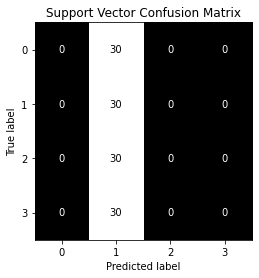

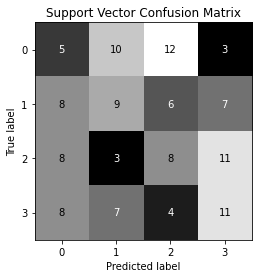

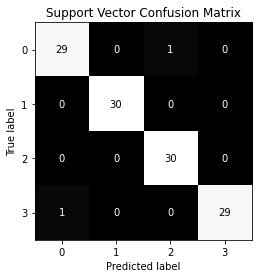

In [331]:
disp = ConfusionMatrixDisplay(confusion_matrix(yTest.ravel(), y_svc_predicted1))  # Predicted compared to actual/test
disp.plot(
    include_values=True,
    cmap='gray',
    colorbar=False
)
disp.ax_.set_title("Support Vector Confusion Matrix")
disp = ConfusionMatrixDisplay(confusion_matrix(yTest.ravel(), y_svc_predicted2))  # Predicted compared to actual/test
disp.plot(
    include_values=True,
    cmap='gray',
    colorbar=False
)
disp.ax_.set_title("Support Vector Confusion Matrix")
disp = ConfusionMatrixDisplay(confusion_matrix(yTest.ravel(), y_svc_predicted3))  # Predicted compared to actual/test
disp.plot(
    include_values=True,
    cmap='gray',
    colorbar=False
)
disp.ax_.set_title("Support Vector Confusion Matrix")

In [335]:
print(classification_report(yTest, y_nbc_predicted1))
print(classification_report(yTest, y_nbc_predicted2))
print(classification_report(yTest, y_nbc_predicted3))

              precision    recall  f1-score   support

           0       0.25      1.00      0.40        30
           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00        30
           3       0.00      0.00      0.00        30

    accuracy                           0.25       120
   macro avg       0.06      0.25      0.10       120
weighted avg       0.06      0.25      0.10       120

              precision    recall  f1-score   support

           0       0.26      1.00      0.41        30
           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00        30
           3       0.33      0.03      0.06        30

    accuracy                           0.26       120
   macro avg       0.15      0.26      0.12       120
weighted avg       0.15      0.26      0.12       120

              precision    recall  f1-score   support

           0       1.00      0.07      0.12        30
           1       0.

C:\Users\Oscar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Oscar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Oscar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Oscar\anaconda3\lib\site-packages\sklearn\metr

Text(0.5, 1.0, 'Naive Bayes Confusion Matrix')

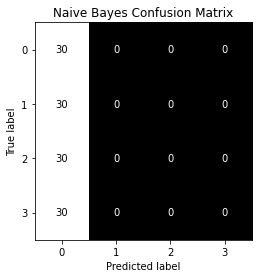

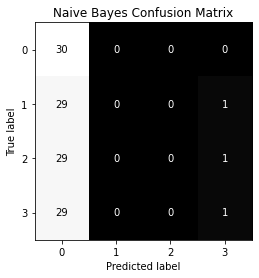

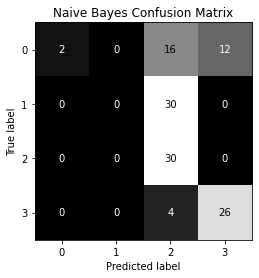

In [337]:
disp = ConfusionMatrixDisplay(confusion_matrix(yTest.ravel(), y_nbc_predicted1))  # Predicted compared to actual/test
disp.plot(
    include_values=True,
    cmap='gray',
    colorbar=False
)
disp.ax_.set_title("Naive Bayes Confusion Matrix")
disp = ConfusionMatrixDisplay(confusion_matrix(yTest.ravel(), y_nbc_predicted2))  # Predicted compared to actual/test
disp.plot(
    include_values=True,
    cmap='gray',
    colorbar=False
)
disp.ax_.set_title("Naive Bayes Confusion Matrix")
disp = ConfusionMatrixDisplay(confusion_matrix(yTest.ravel(), y_nbc_predicted3))  # Predicted compared to actual/test
disp.plot(
    include_values=True,
    cmap='gray',
    colorbar=False
)
disp.ax_.set_title("Naive Bayes Confusion Matrix")

In [338]:
print(classification_report(yTest, y_rfc_predicted1))
print(classification_report(yTest, y_rfc_predicted2))
print(classification_report(yTest, y_rfc_predicted3))

              precision    recall  f1-score   support

           0       0.38      0.37      0.37        30
           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00        30
           3       0.27      0.83      0.41        30

    accuracy                           0.30       120
   macro avg       0.16      0.30      0.20       120
weighted avg       0.16      0.30      0.20       120

              precision    recall  f1-score   support

           0       0.17      0.17      0.17        30
           1       0.31      0.30      0.31        30
           2       0.27      0.27      0.27        30
           3       0.34      0.37      0.35        30

    accuracy                           0.28       120
   macro avg       0.27      0.28      0.27       120
weighted avg       0.27      0.28      0.27       120

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.

C:\Users\Oscar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Oscar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Oscar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

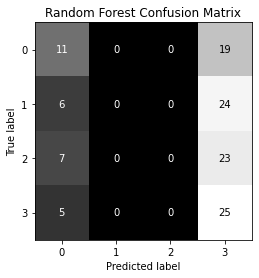

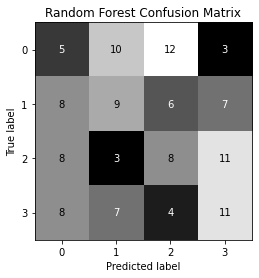

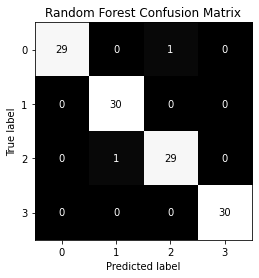

In [339]:
disp = ConfusionMatrixDisplay(confusion_matrix(yTest.ravel(), y_rfc_predicted1))  # Predicted compared to actual/test
disp.plot(
    include_values=True,
    cmap='gray',
    colorbar=False
)
disp.ax_.set_title("Random Forest Confusion Matrix")
disp = ConfusionMatrixDisplay(confusion_matrix(yTest.ravel(), y_rfc_predicted2))  # Predicted compared to actual/test
disp.plot(
    include_values=True,
    cmap='gray',
    colorbar=False
)
disp.ax_.set_title("Random Forest Confusion Matrix")
disp = ConfusionMatrixDisplay(confusion_matrix(yTest.ravel(), y_rfc_predicted3))  # Predicted compared to actual/test
disp.plot(
    include_values=True,
    cmap='gray',
    colorbar=False
)
disp.ax_.set_title("Random Forest Confusion Matrix")